In [4]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os

import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import create_output
print('Number of tissues: ',len(tissues))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('Number of tissues: ', 13)


## Create directory

In [2]:
if not os.path.exists("Results/Figures/Figure3/Data/"):
    os.makedirs("Results/Figures/Figure3/Data/")
    
if not os.path.exists("Results/Figures/Figure3/Distance_to_Anno/"):
    os.makedirs("Results/Figures/Figure3/Distance_to_Anno/")

# Panel A + B 
A: histogram  
B: Heat map

peak options:  
1) From output   
2) From txn_df peaks  
3) CHO-specific  
4) From output but peak 1 vs others .  

Tag Options:  
1) All merged  
2) CHO-Specific

## i. Peak option 1; Tag option 1

In [3]:
mRNA_peak_file

'/data/isshamie/genome/ncbi_anno_103/mRNA_final.peak'

In [12]:
foo = pd.DataFrame([[1,2,3],[1,1,3],[2,1,1]])
print(foo)
foo.drop_duplicates(subset=[0])

   0  1  2
0  1  2  3
1  1  1  3
2  2  1  1


0  1  2
0  1  2  3
2  2  1  1

In [13]:
foo.drop_duplicates(subset=[0,1])

0  1  2
0  1  2  3
1  1  1  3
2  2  1  1

In [14]:
foo.drop_duplicates(subset=[0,2],keep=)

0  1  2
0  1  2  3
2  2  1  1

In [15]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
meta_f = "Results/output/TSS1.exp.meta"
save_f = "Results/Figures/Figure3/TSS1_mrna"

tag_f = "Results/merged/tags_TSS_merged"

mrna_filt = "Results/Figures/Figure3/A.mrna"
create_output.exp_bed_to_refseq(peak_f,meta_f,refseq_f=mRNA_peak_file,save_f=save_f,is_unique=True)

0        1        2  \
3                                                                  
p1@Bmp4_XM_027386529.1          NW_020822366.1   722307   722309   
p1@Bmp4_XM_027386528.1          NW_020822366.1   724609   724611   
p1@Cdkn3_XM_027386531.1         NW_020822366.1  1085434  1085436   
p1@Cnih1_XM_027386534.1         NW_020822366.1  1114412  1114414   
p1@Cgrrf1_XM_027386536.1        NW_020822366.1  1159882  1159884   
p1@Samd4a_XM_027386537.1        NW_020822366.1  1214840  1214842   
p1@Samd4a_XM_027386539.1        NW_020822366.1  1333155  1333157   
p1@Gch1_XM_027386540.1          NW_020822366.1  1513794  1513796   
p1@Wdhd1_XM_027386542.1         NW_020822366.1  1605102  1605104   
p1@Socs4_XM_027386543.1         NW_020822366.1  1605291  1605293   
p1@Mapk1ip1l_XM_027386545.1     NW_020822366.1  1634569  1634571   
p1@Lgals3_XM_027386548.1        NW_020822366.1  1718834  1718836   
p1@Dlgap5_XM_027386547.1        NW_020822366.1  1759926  1759928   
p1@Dlgap5_XM_027386546.1        NW_020822366.1  1765500  1765502   
p1@Atg14_XM_027386553.1         NW_020822366.1  1915209  1915211   
p1@Ktn1_XM_027386554.1          NW_020822366.1  1981600  1981602   
p1@LOC100768260_XM_027386564.1  NW_020822366.1  2440071  2440073   
p1@LOC100768260_XM_027386567.1  NW_020822366.1  2440074  2440076   
p1@Tmem260_XM_027386568.1       NW_020822366.1  2801532  2801534   
p1@Exoc5_XM_027386571.1         NW_020822366.1  3417724  3417726   
p1@Ap5m1_XM_027386573.1         NW_020822366.1  3418098  3418100   
p1@Naa30_XM_027386575.1         NW_020822366.1  3518348  3518350   
p1@Naa30_XM_027386574.1         NW_020822366.1  3518525  3518527   
p1@Ccdc198_XM_027386577.1       NW_020822366.1  3595926  3595928   
p1@LOC100772688_XM_027386580.1  NW_020822366.1  4117228  4117230   
p1@Ttc5_XM_027386585.1          NW_020822366.1  4746158  4746160   
p1@Parp2_XM_027386589.1         NW_020822366.1  4772546  4772548   
p1@Tep1_XM_027386592.1          NW_020822366.1  4842495  4842497   
p1@Osgep_XM_027386596.1         NW_020822366.1  4903304  4903306   
p1@Osgep_XM_027386600.1         NW_020822366.1  4901611  4901613   
...                                        ...      ...      ...   
p1@Snrpn_XM_027434099.1         NW_020823558.1    69028    69030   
p1@Twistnb_XM_027434130.1       NW_020823586.1    49205    49207   
p1@LOC113831730_XM_027434132.1  NW_020823587.1    14923    14925   
p1@LOC100753890_XM_027434150.1  NW_020823602.1    24365    24367   
p1@LOC113838541_XM_027434168.1  NW_020823627.1    44150    44152   
p1@LOC113838538_XM_027434165.1  NW_020823627.1    45116    45118   
p1@LOC113838538_XM_027434162.1  NW_020823627.1    45268    45270   
p1@LOC113838537_XM_027434161.1  NW_020823627.1    62529    62531   
p1@LOC113838542_XM_027434169.1  NW_020823627.1    64626    64628   
p1@LOC100769620_XM_027434174.1  NW_020823629.1    62786    62788   
p1@LOC100769912_XM_027434173.1  NW_020823629.1    71809    71811   
p1@LOC113831691_XM_027434189.1  NW_020823639.1     7380     7382   
p1@LOC100757478_XM_027434222.1  NW_020823676.1    29505    29507   
p1@LOC113831730_XM_027434333.1  NW_020823792.1    24752    24754   
p1@LOC113838852_XM_027434360.1  NW_020823819.1    10068    10070   
p1@LOC113838855_XM_027434367.1  NW_020823819.1    37334    37336   
p1@LOC113838897_XM_027434403.1  NW_020823856.1    11267    11269   
p1@LOC107977194_XM_027434428.1  NW_020823876.1    33406    33408   
p1@LOC100751996_XM_027434444.1  NW_020823898.1    37436    37438   
p1@LOC113838952_XM_027434451.1  NW_020823908.1     4464     4466   
p1@LOC113838972_XM_027434460.1  NW_020823928.1    19891    19893   
p1@LOC113838971_XM_027434459.1  NW_020823928.1    20895    20897   
p1@LOC113839006_XM_027434479.1  NW_020823970.1     3417     3419   
p1@LOC113839031_XM_027434493.1  NW_020824001.1    38201    38203   
p1@LOC113839047_XM_027434508.1  NW_020824030.1    41013    41015   
p1@LOC113839066_XM_027434527.1  NW_020824056.1     5213     5215   
p1@LOC113839076_XM_027434536.1  N

In [4]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
meta_f = "Results/output/TSS1.exp.meta"

i = peak_f
tag_f = "Results/merged/tags_TSS_merged"
mrna_filt = "Results/Figures/Figure3/A.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)


transcript_id             Chr    Start      End Strand  actual_start  \
0      XM_027386529.1  NW_020822366.1   722307   722309      -        722308   
1      XM_027386530.1  NW_020822366.1   722307   722309      -        722308   
2      XM_027386528.1  NW_020822366.1   724609   724611      -        724610   
3      XM_027386531.1  NW_020822366.1  1085434  1085436      +       1085435   
4      XM_027386532.1  NW_020822366.1  1085434  1085436      +       1085435   
5      XM_027386533.1  NW_020822366.1  1085743  1085745      +       1085744   
6      XM_027386534.1  NW_020822366.1  1114412  1114414      -       1114413   
8      XM_027386536.1  NW_020822366.1  1159882  1159884      +       1159883   
9      XM_027386537.1  NW_020822366.1  1214840  1214842      +       1214841   
10     XM_027386538.1  NW_020822366.1  1214842  1214844      +       1214843   
11     XM_027386539.1  NW_020822366.1  1333155  1333157      +       1333156   
12     XM_027386540.1  NW_020822366.1  1513794  1513796      -       1513795   
13     XM_027386542.1  NW_020822366.1  1605102  1605104      -       1605103   
14     XM_027386541.1  NW_020822366.1  1605102  1605104      -       1605103   
15     XM_027386543.1  NW_020822366.1  1605291  1605293      +       1605292   
16     XM_027386544.1  NW_020822366.1  1634566  1634568      +       1634567   
17     XM_027386545.1  NW_020822366.1  1634569  1634571      +       1634570   
18     XM_027386548.1  NW_020822366.1  1718834  1718836      +       1718835   
19     XM_027386547.1  NW_020822366.1  1759926  1759928      -       1759927   
20     XM_027386546.1  NW_020822366.1  1765500  1765502      -       1765501   
25     XM_027386553.1  NW_020822366.1  1915209  1915211      -       1915210   
26     XM_027386554.1  NW_020822366.1  1981600  1981602      +       1981601   
27     XM_027386558.1  NW_020822366.1  1981600  1981602      +       1981601   
28     XM_027386559.1  NW_020822366.1  1981600  1981602      +       1981601   
29     XM_027386561.1  NW_020822366.1  1981600  1981602      +       1981601   
30     XM_027386557.1  NW_020822366.1  1981600  1981602      +       1981601   
31     XM_027386560.1  NW_020822366.1  1981600  1981602      +       1981601   
32     XM_027386556.1  NW_020822366.1  1981600  1981602      +       1981601   
34     XM_027386564.1  NW_020822366.1  2440071  2440073      +       2440072   
35     XM_027386565.1  NW_020822366.1  2440071  2440073      +       2440072   
...               ...             ...      ...      ...    ...           ...   
46359  XM_027434172.1  NW_020823629.1    71809    71811      -         71810   
46373  XM_027434189.1  NW_020823639.1     7380     7382      +          7381   
46406  XM_027434222.1  NW_020823676.1    29505    29507      -         29506   
46504  XM_027434333.1  NW_020823792.1    24752    24754      -         24753   
46529  XM_027434360.1  NW_020823819.1    10068    10070      +         10069   
46530  XM_027434361.1  NW_020823819.1    10068    10070      +         10069   
46531  XM_027434359.1  NW_020823819.1    10817    10819      +         10818   
46532  XM_027434362.1  NW_020823819.1    10822    10824      +         10823   
46533  XM_027434363.1  NW_020823819.1    10829    10831      +         10830   
46534  XM_027434364.1  NW_020823819.1    10830    10832      +         10831   
46536  XM_027434367.1  NW_020823819.1    37334    37336      +         37335   
46571  XM_027434403.1  NW_020823856.1    11267    11269      +         11268   
46595  XM_027434428.1  NW_020823876.1    33406    33408      +         33407   
46612  XM_027434444.1  NW_020823898.1    37436    37438      +         37437   
46616  XM_027434451.1  NW_020823908.1     4464     4466      +          4465   
46617  XM_027434452.1  NW_020823908.1     4464     4466      +          4465   
46624  XM_027434460.1  NW_020823928.1    19891    19893      -         19892   
46625  XM_027434459.1  NW_020823928.1    20895    20897      +         20896   
46644  X

('output histogram mrna', 'Results/Figures/Figure3/A.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > 

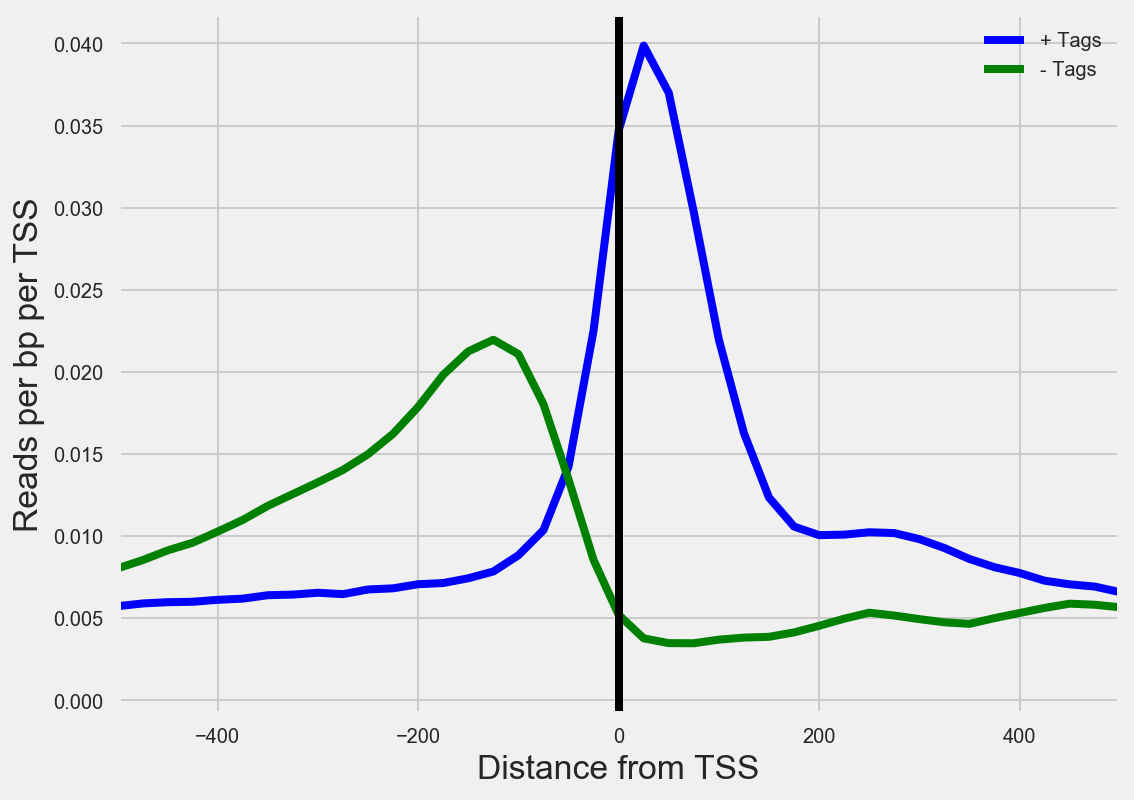

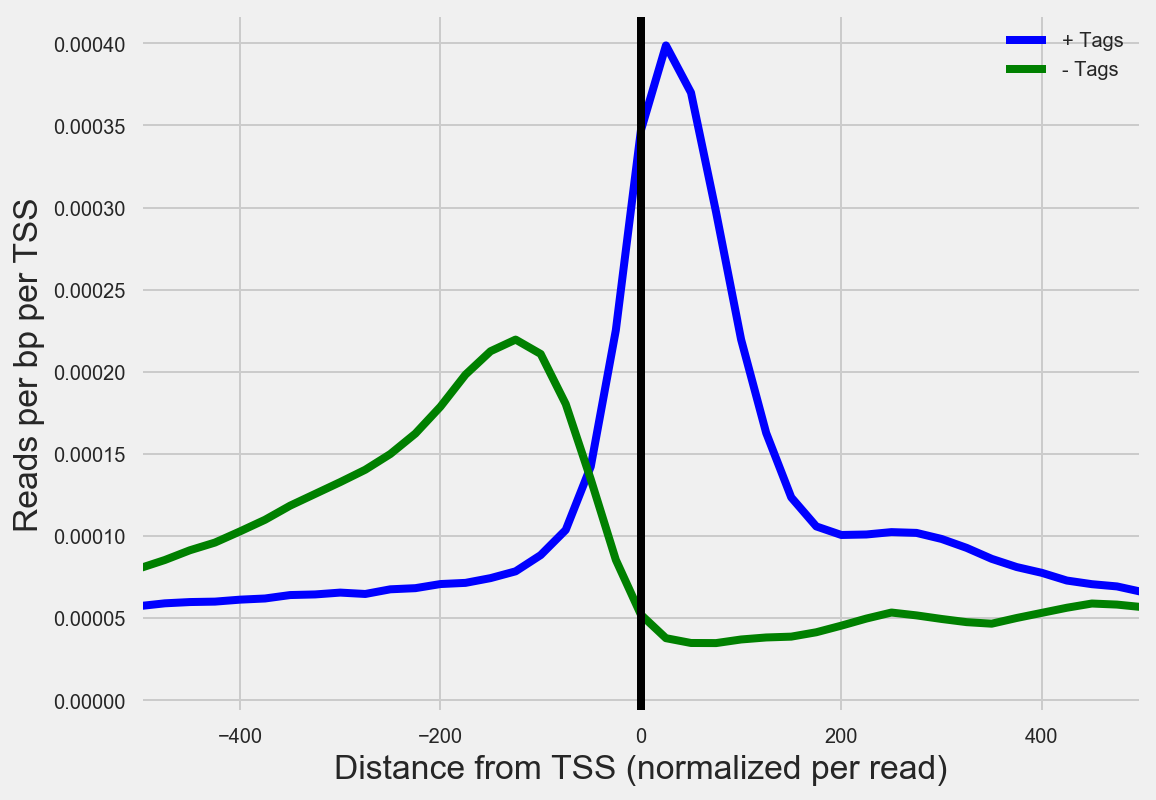

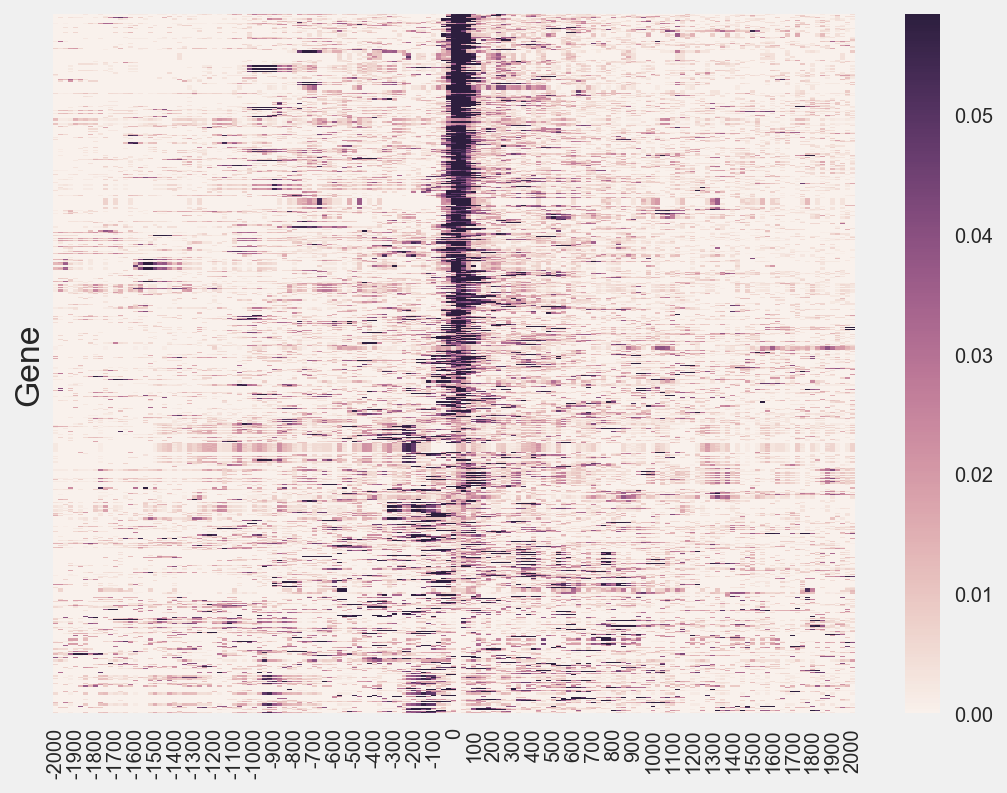

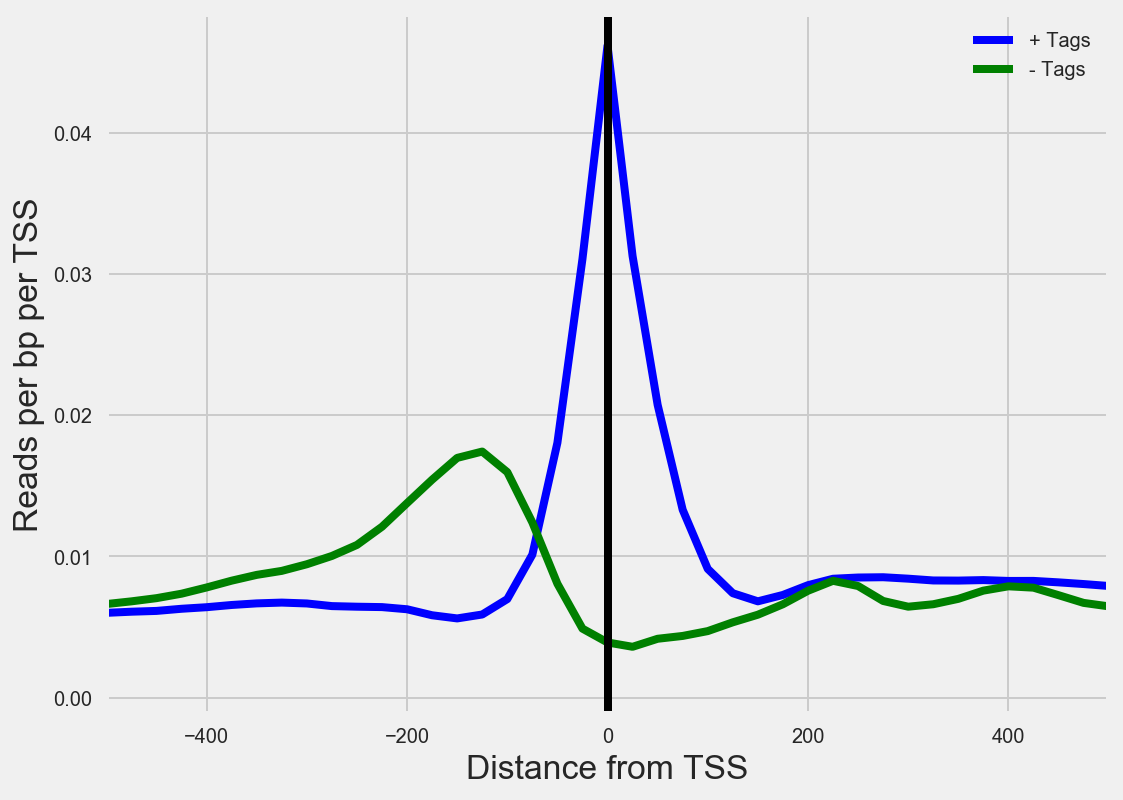

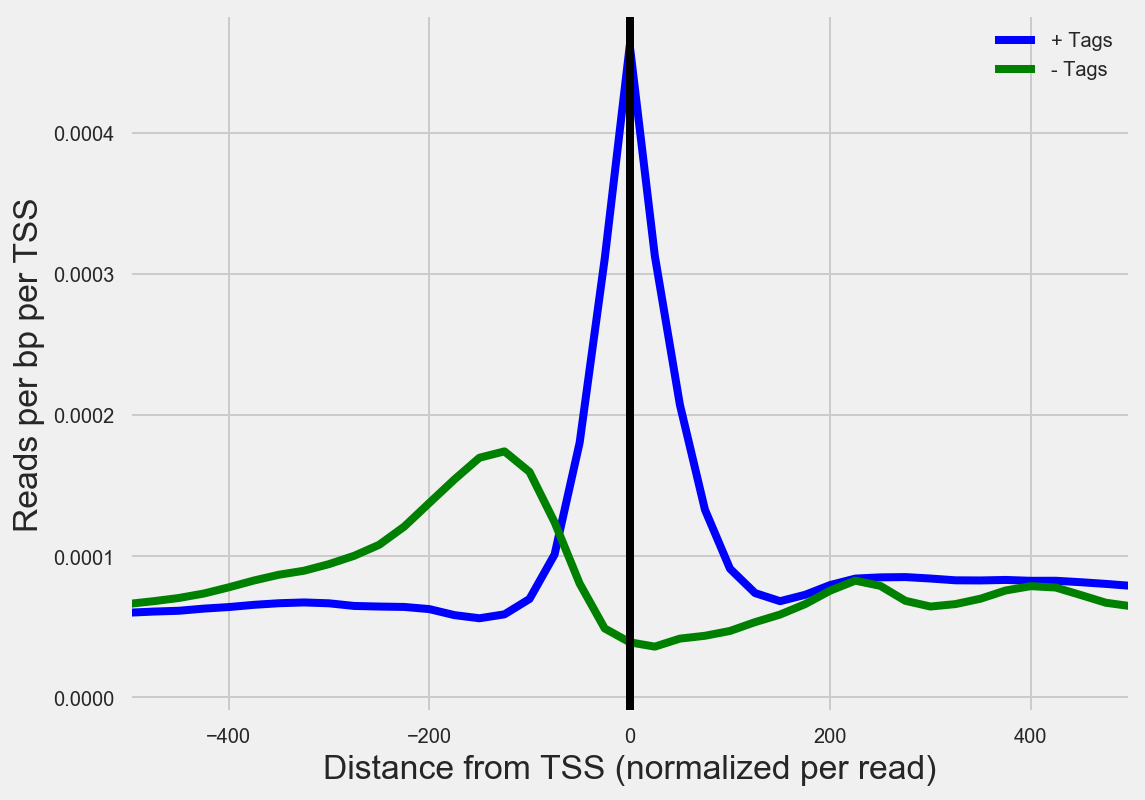

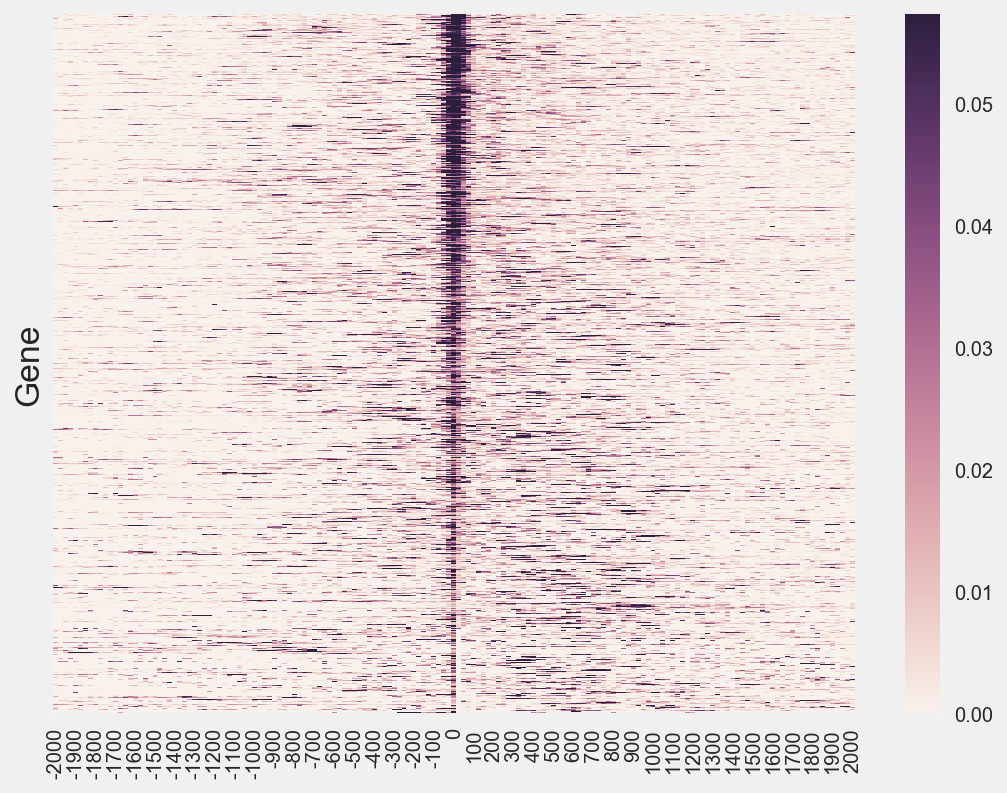

In [5]:
# Refseq 
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

('output histogram mrna', 'Results/Figures/Figure3/A.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > 

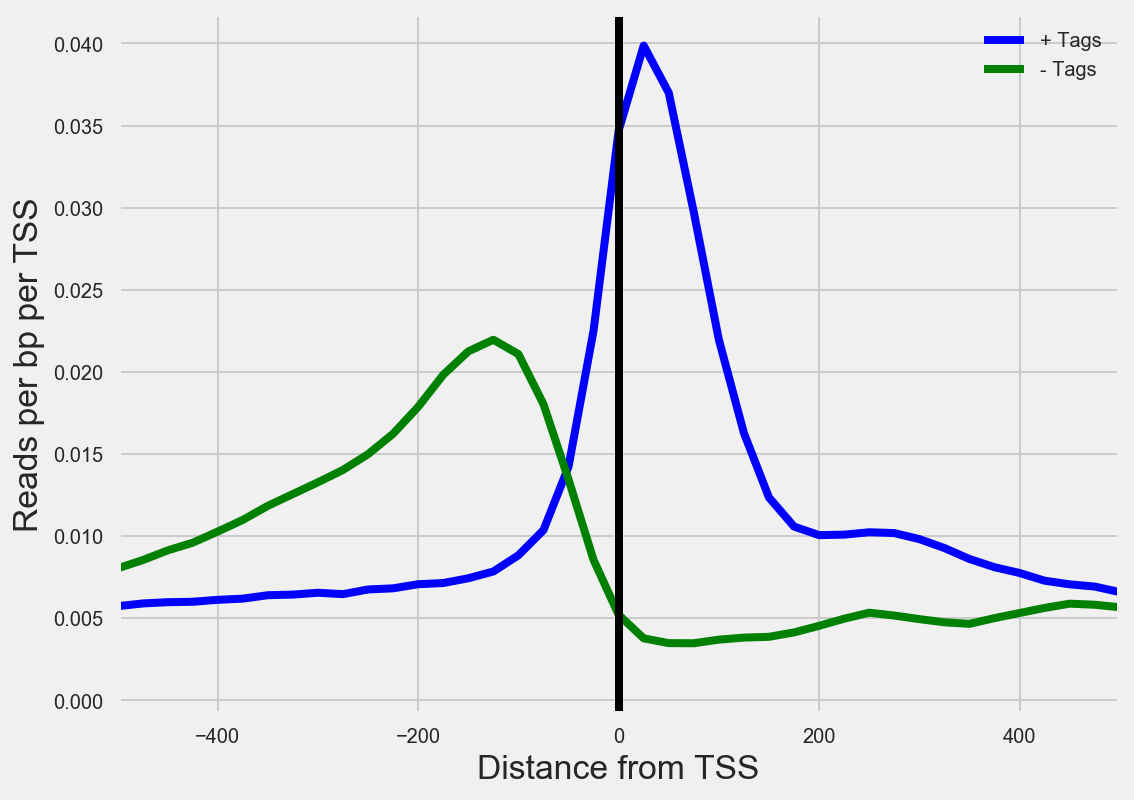

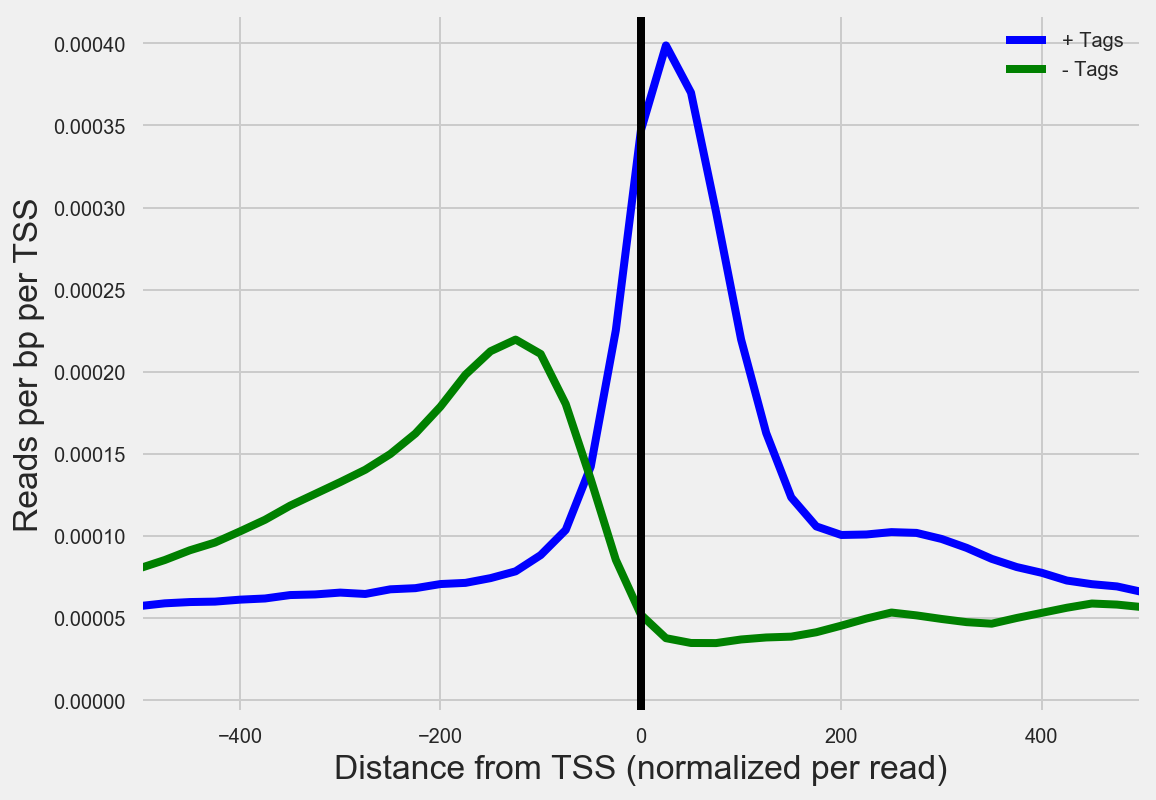

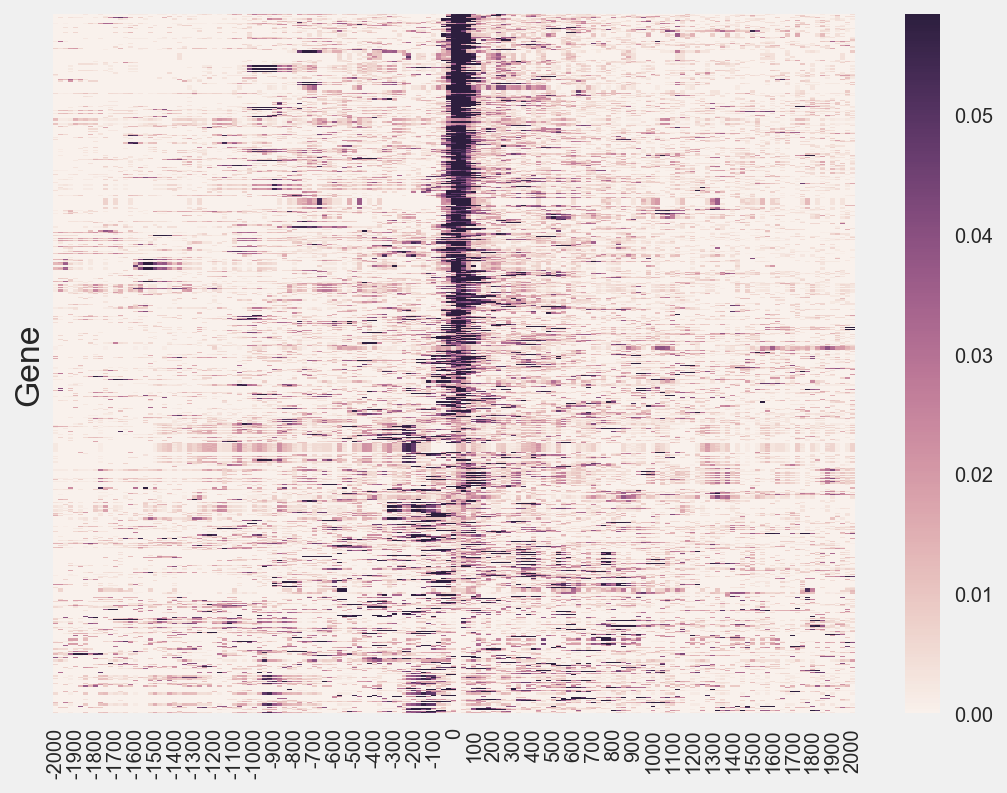

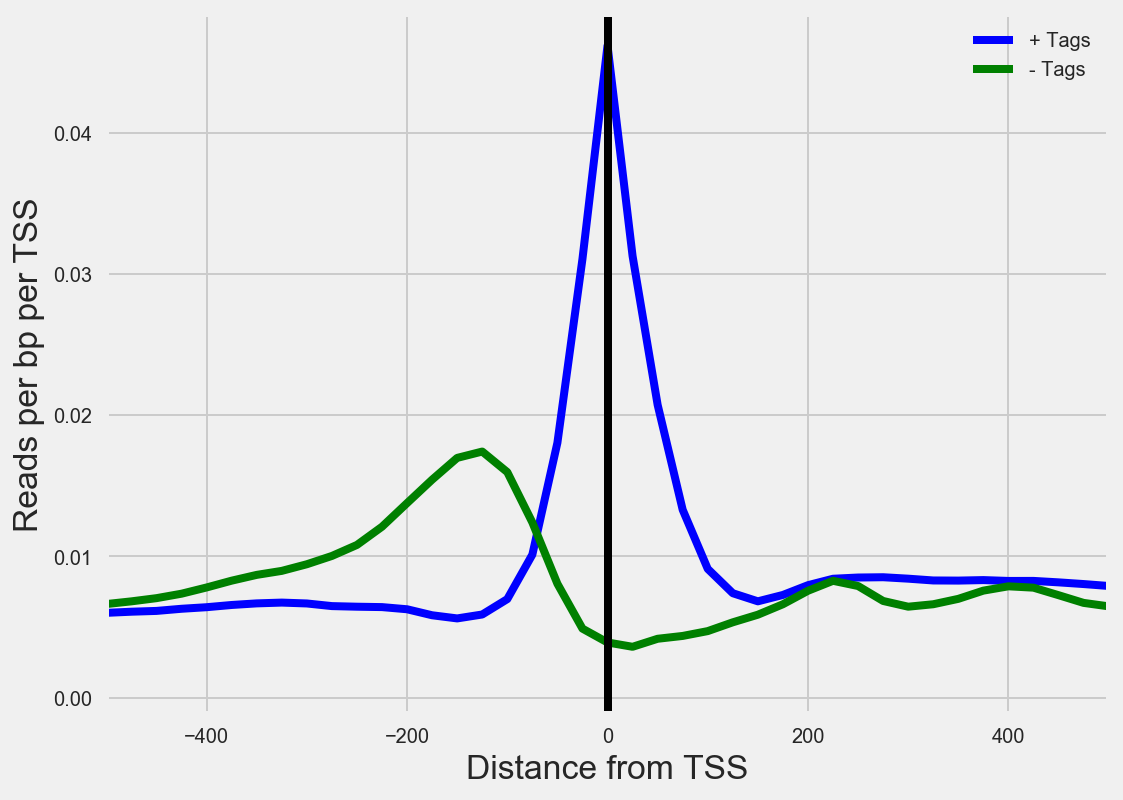

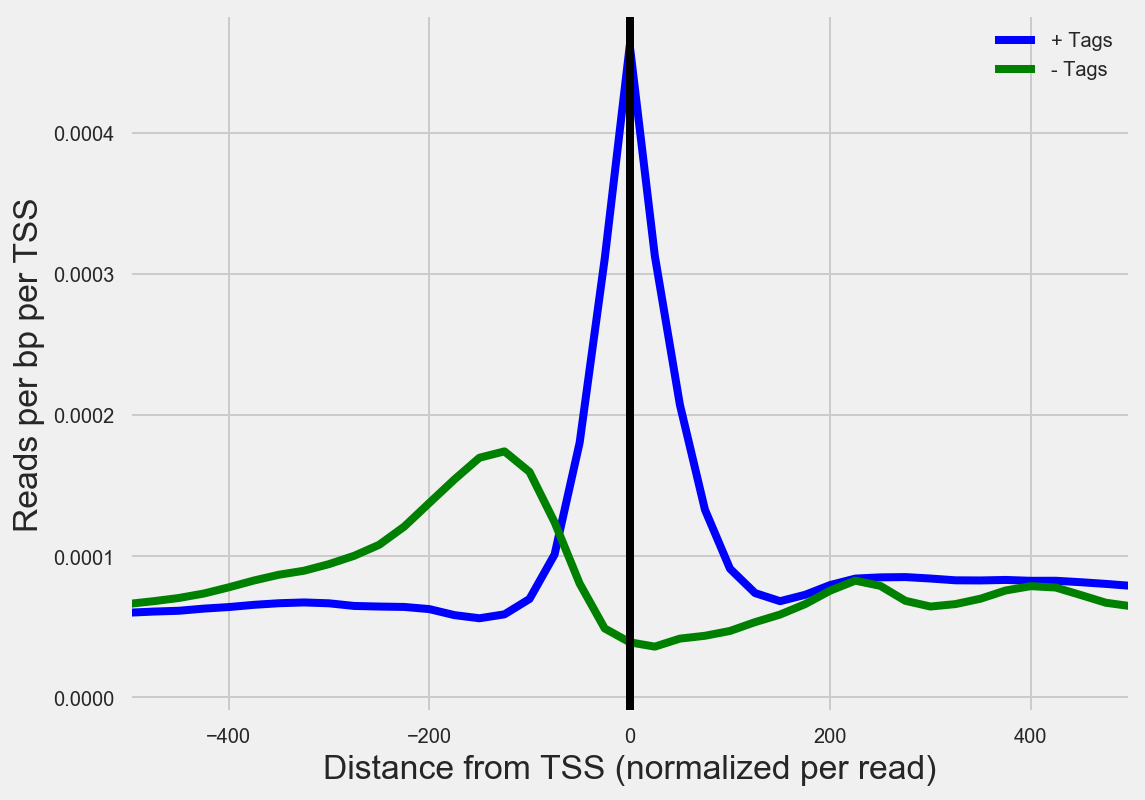

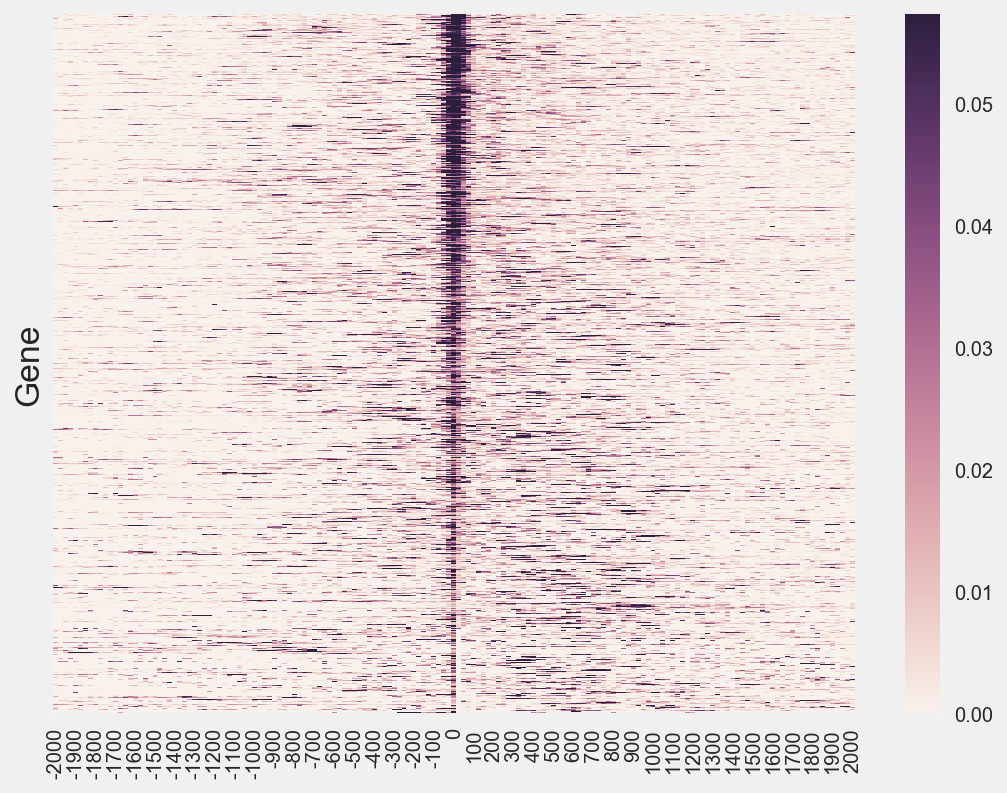

In [5]:
# Refseq 
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

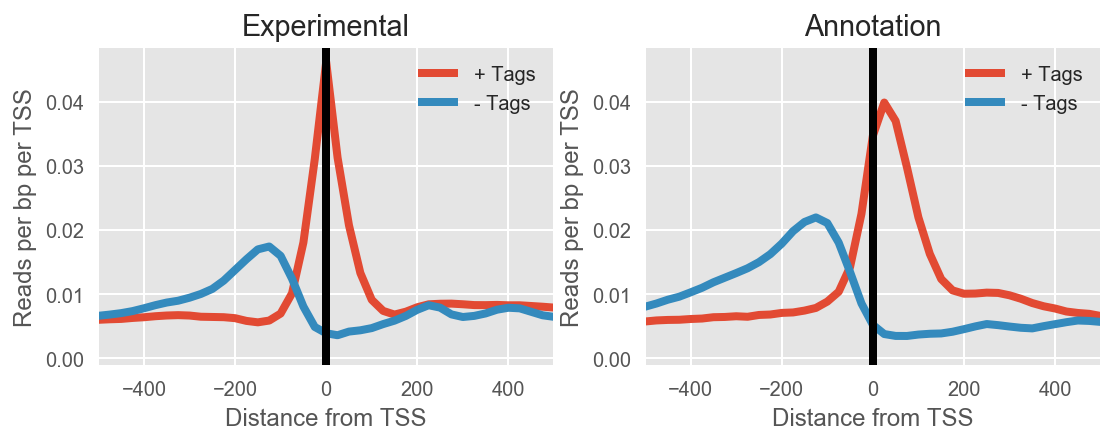

In [3]:
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"

wrap_hist_plot([output_file_exp ,
                output_file_mrna ], hist_save="Results/Figures/Figure3/A.combine.png",
                    names=["Experimental","Annotation"])

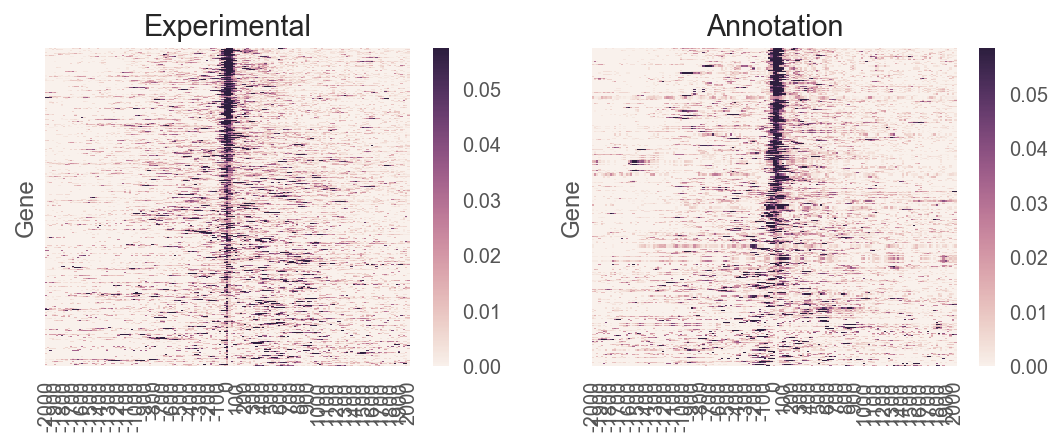

In [6]:
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"

wrap_heat_plot([output_file_exp+'MatS',
                output_file_mrna+'MatS'], heat_save="Results/Figures/Figure3/B.combine.png",
                    names=["Experimental","Annotation"])

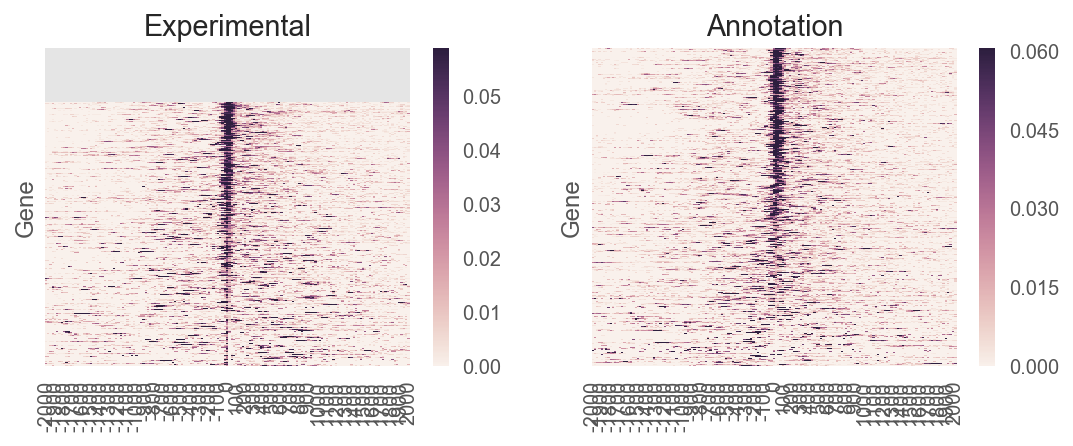

In [ ]:
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"

wrap_heat_plot([output_file_exp+'MatS',
                output_file_mrna+'MatS'], heat_save="Results/Figures/Figure3/B.combine_full.png",
                    names=["Experimental","RefSeq"],num_peaks=100000)

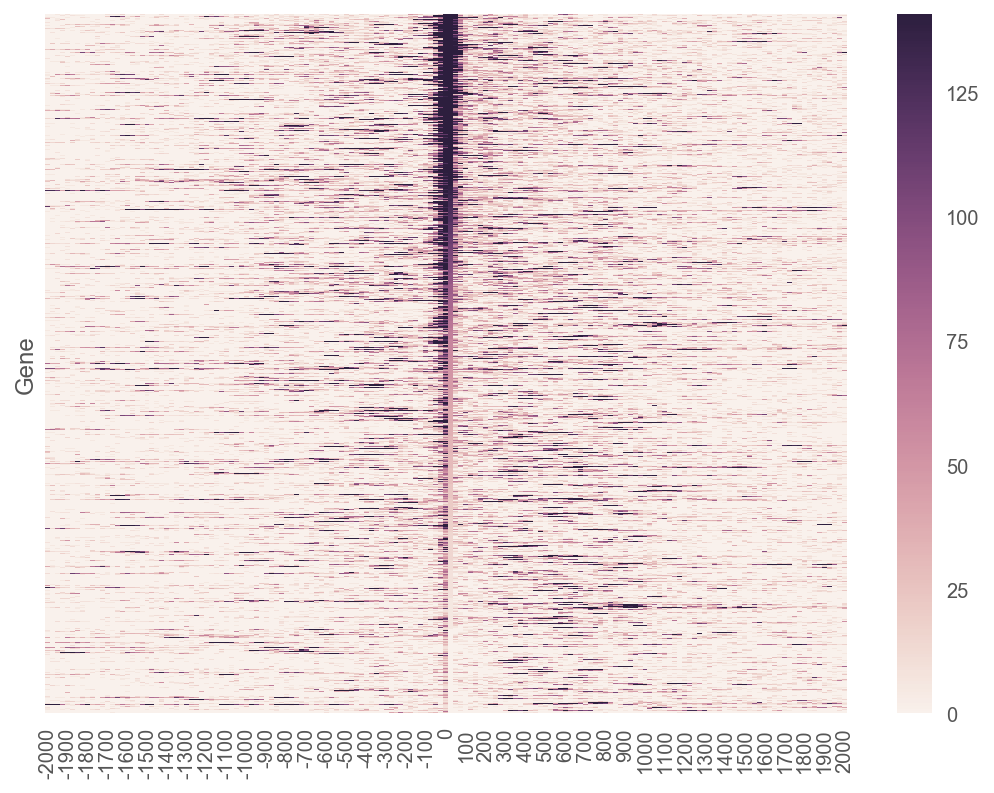

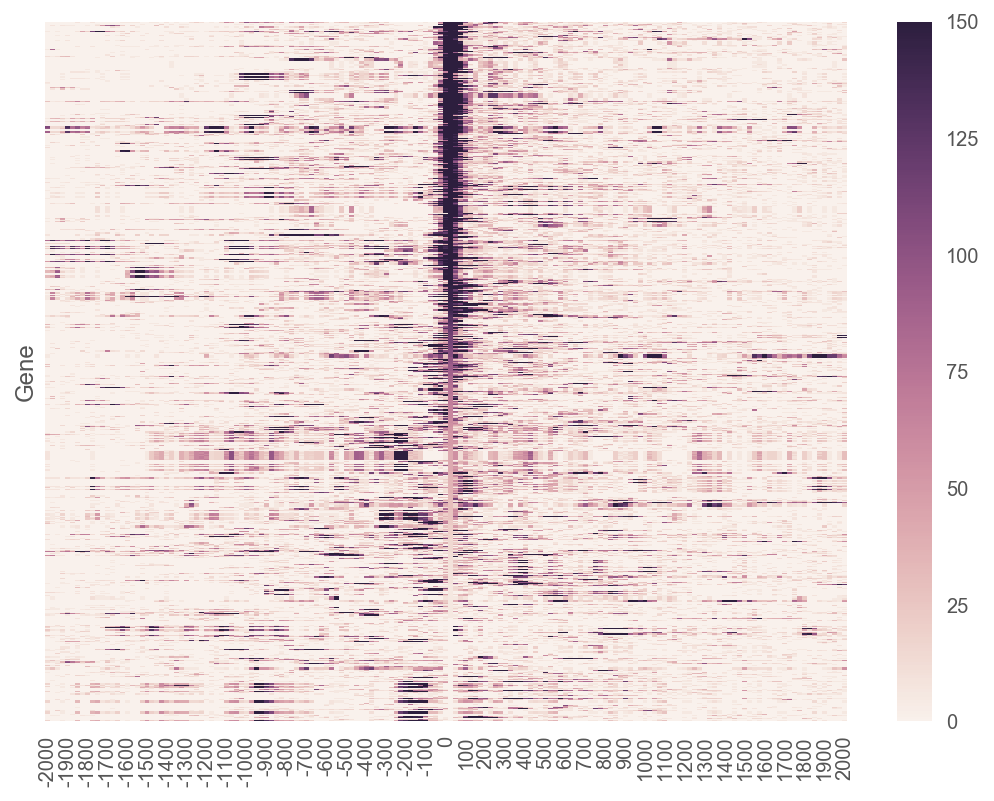

In [ ]:
## Run without normalization
heat_df = heat_plot(output_file_exp+'MatS',is_norm=False,save_f = output_file_exp + '.noNorm.heat.png' )
heat_df = heat_plot(output_file_mrna+'MatS',is_norm=False,save_f = output_file_exp + '.noNorm.heat.png' )

## ii. Tags from CHO GRO-Cap

('output histogram mrna', 'Results/Figures/Figure3/A_ii.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/Figures/Figure3/A_ii.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d /data/isshamie/TSS/NCBI_PICR_103_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1 -pc 3 > Results/Figures/Figure3/A_ii.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriG

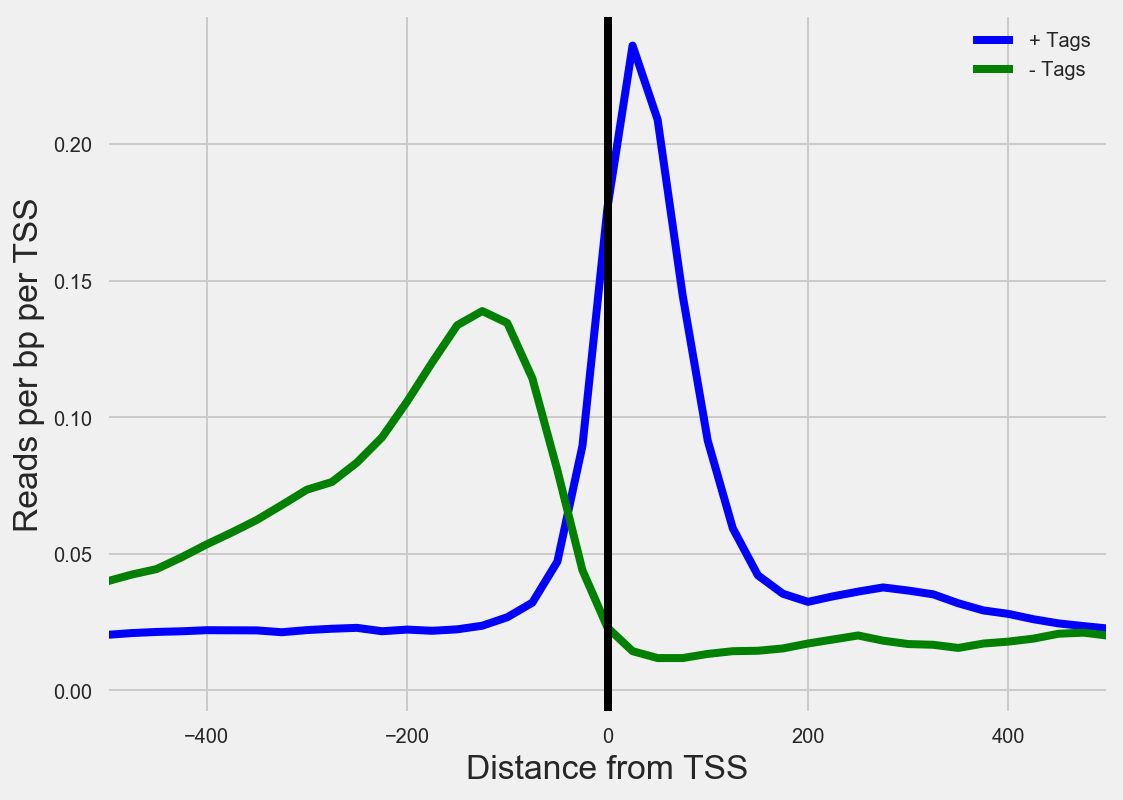

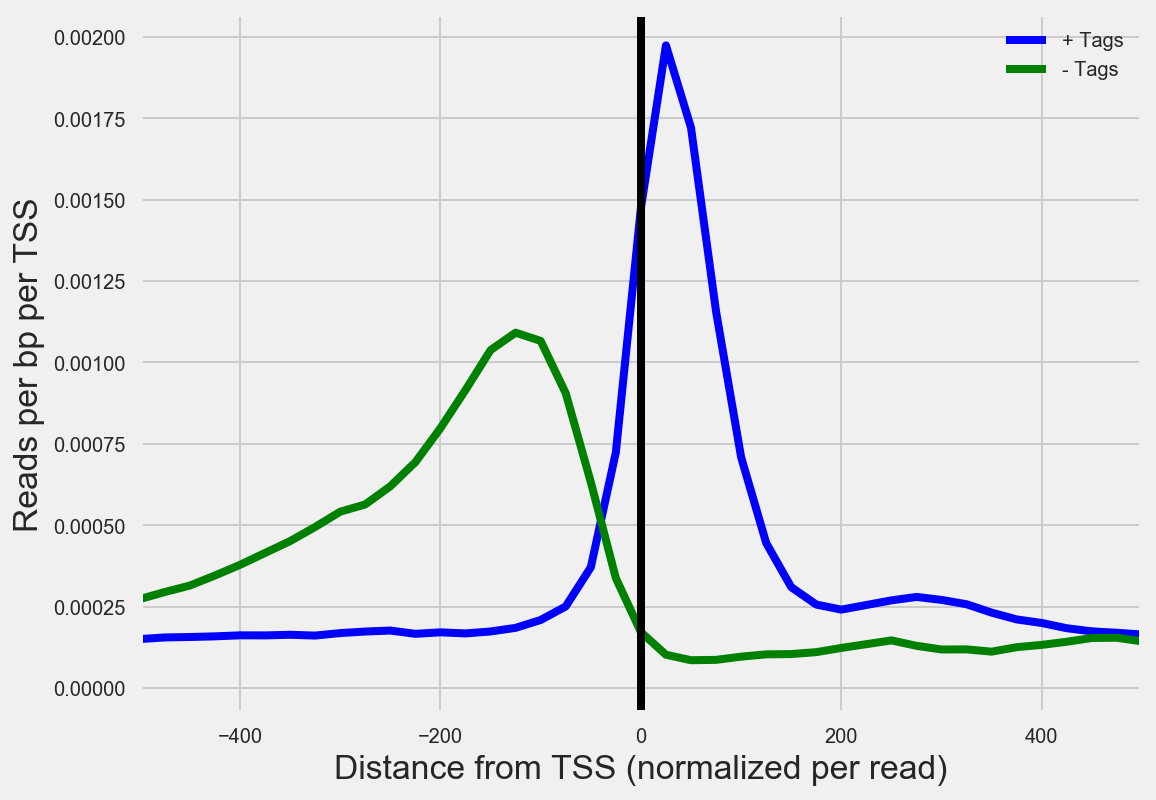

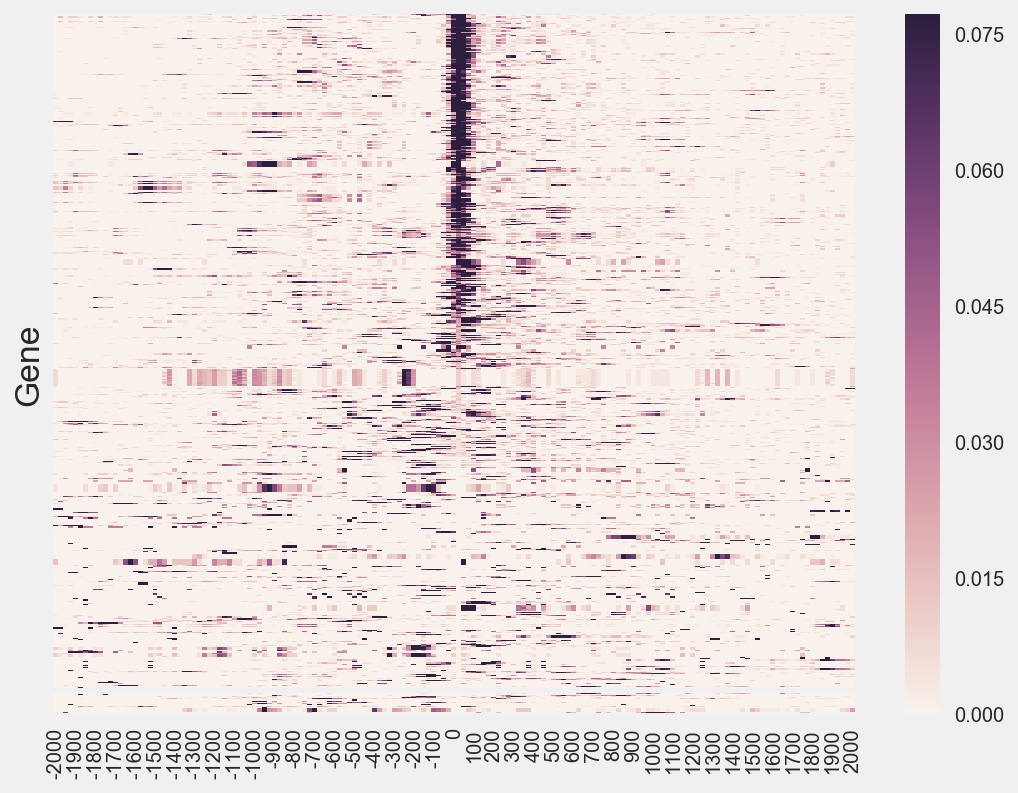

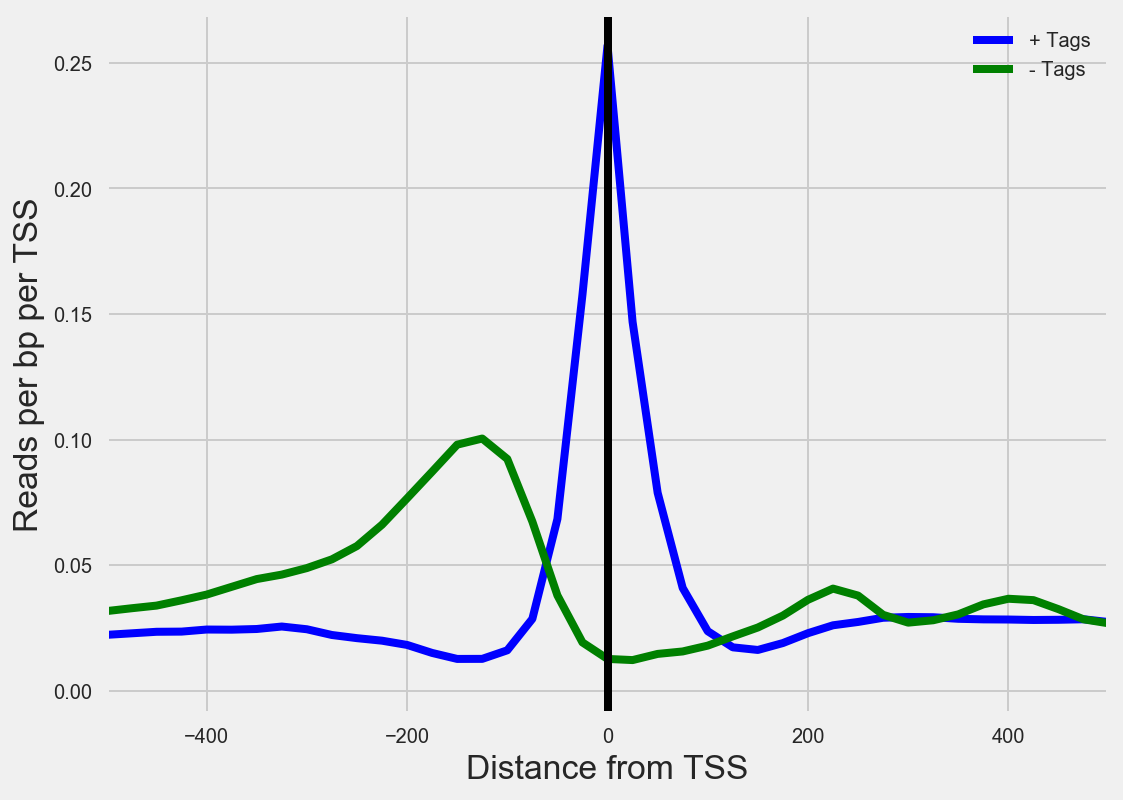

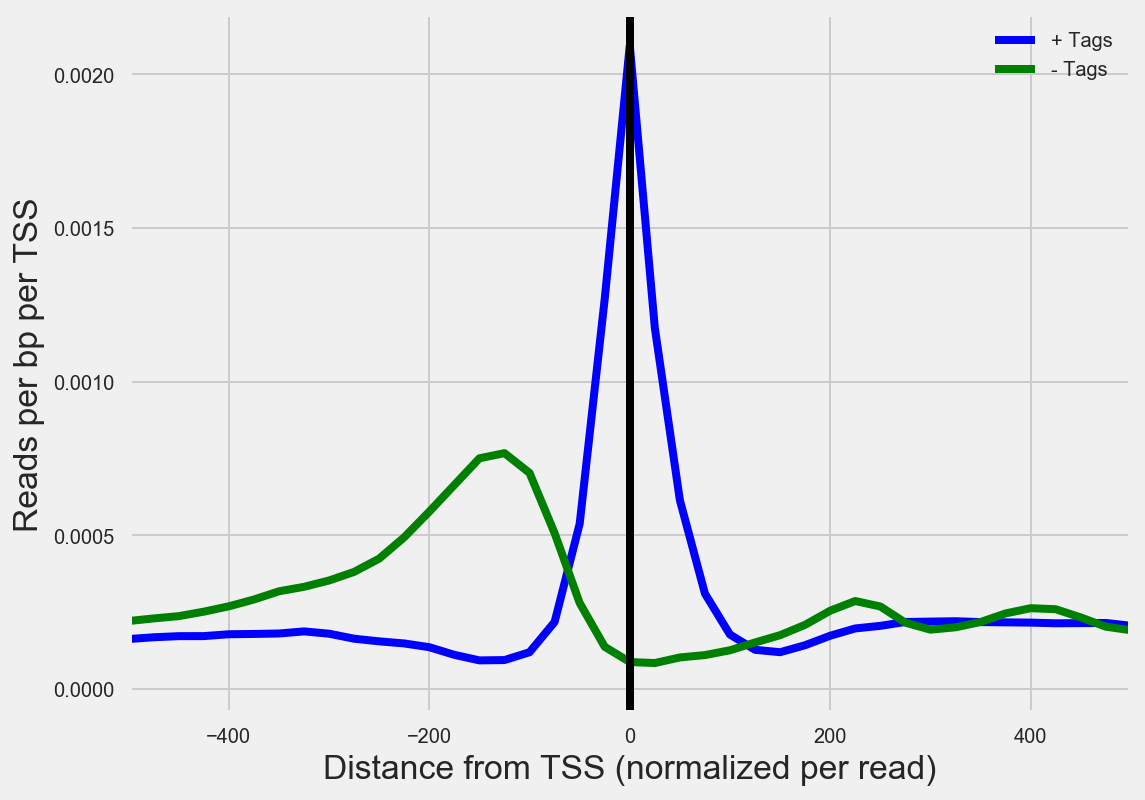

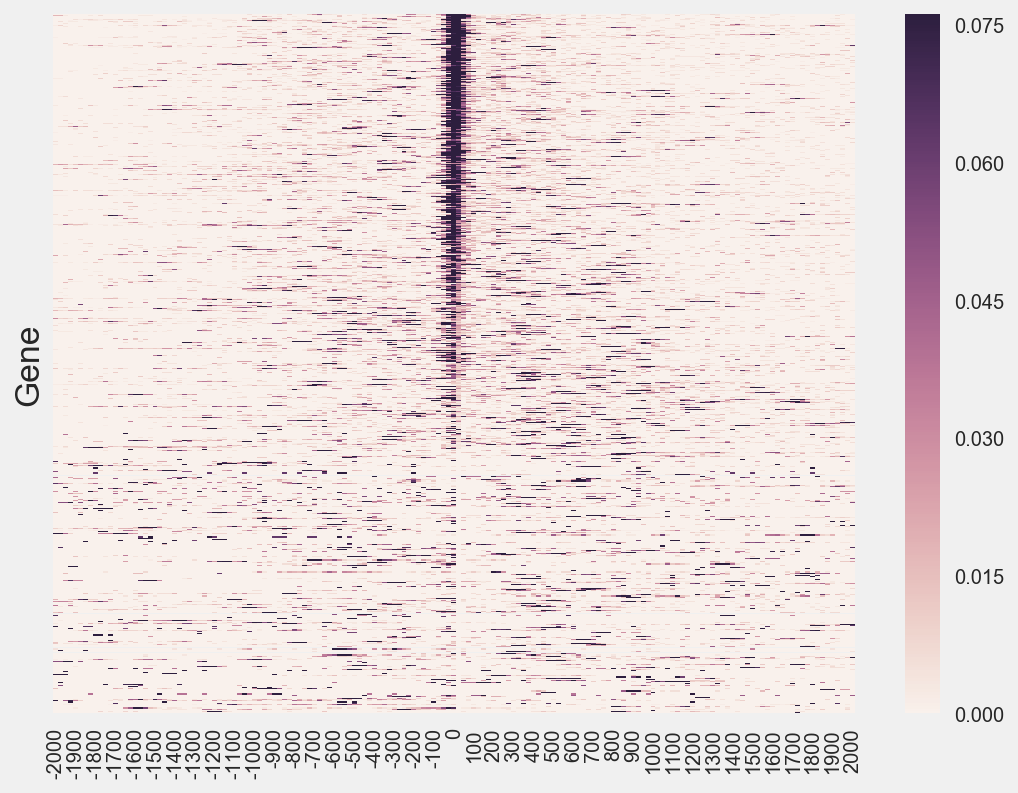

In [7]:
# Refseq 

peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = os.path.join(data_folder,"CHO/GROCap/f03_tags/trim_CHO_GROCap1")

## Create RefSeq peak file for this
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)
output_file_mrna = "Results/Figures/Figure3/A_ii.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A_ii.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

## iii. Peaks 

# Panel C. Nucleotide Sequences of Experimental TSS vs RefSeq TSS

## i. 

annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt


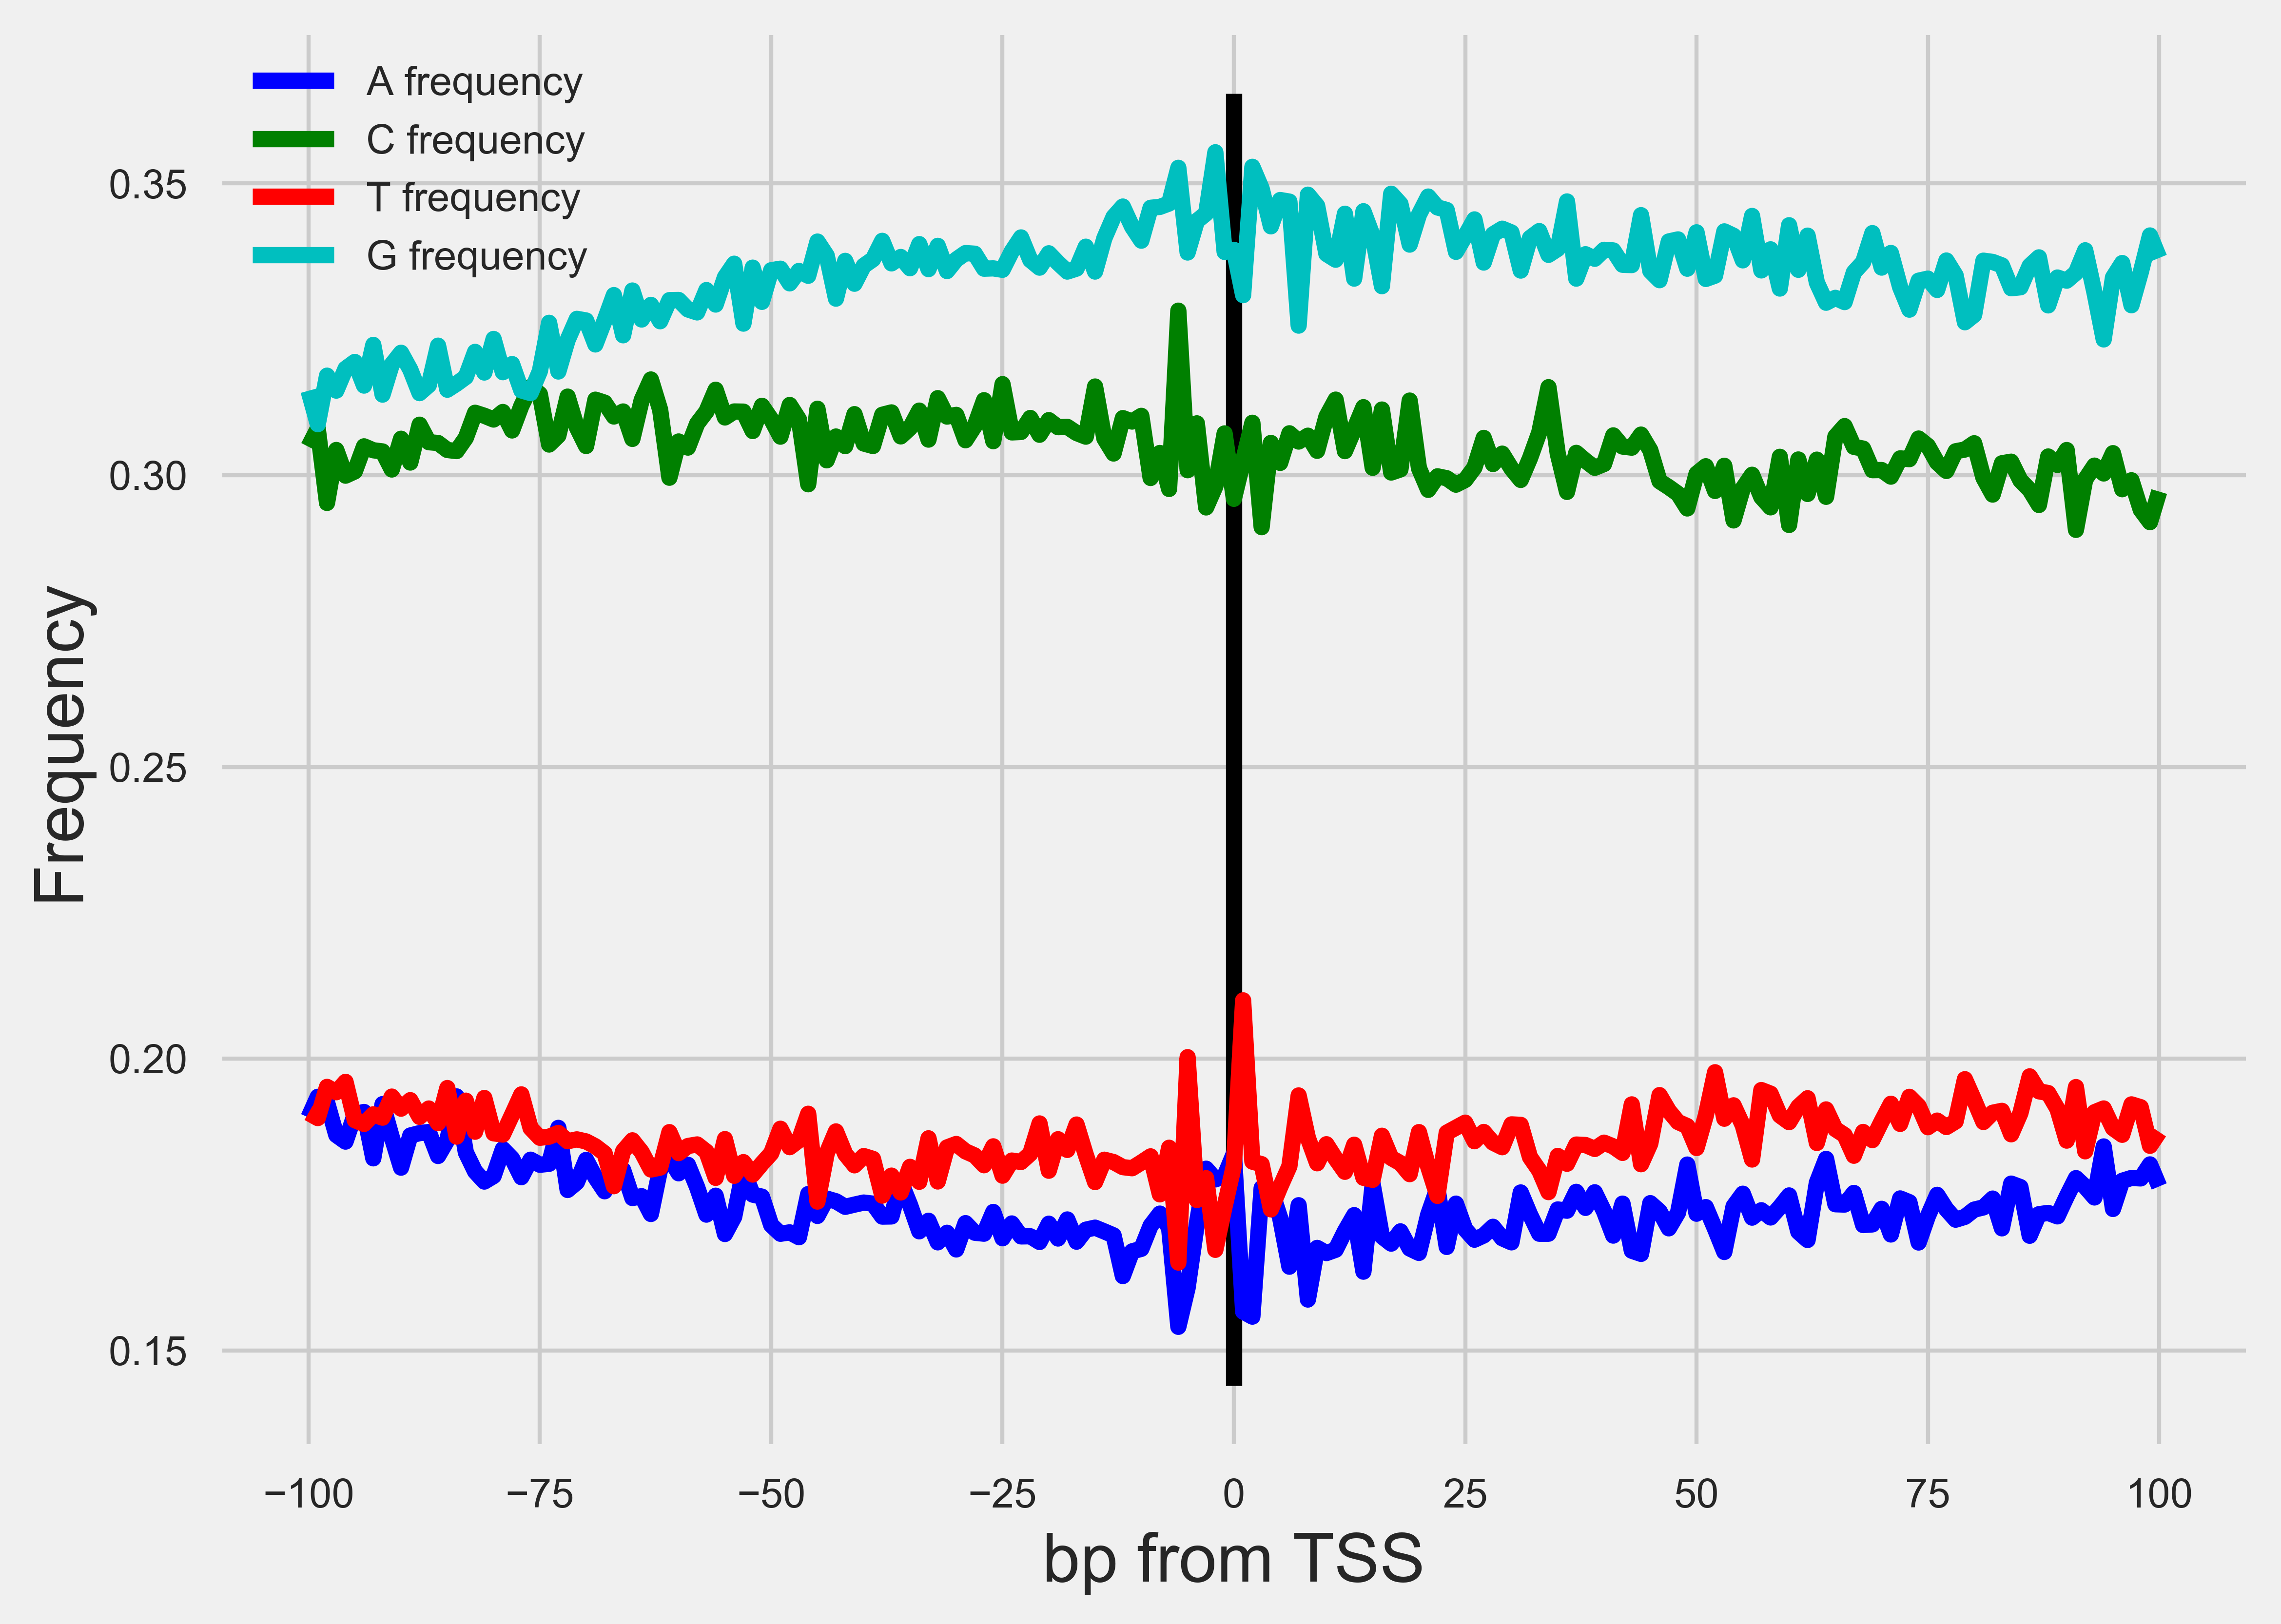

In [8]:
mrna_filt = "Results/Figures/Figure3/A.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt


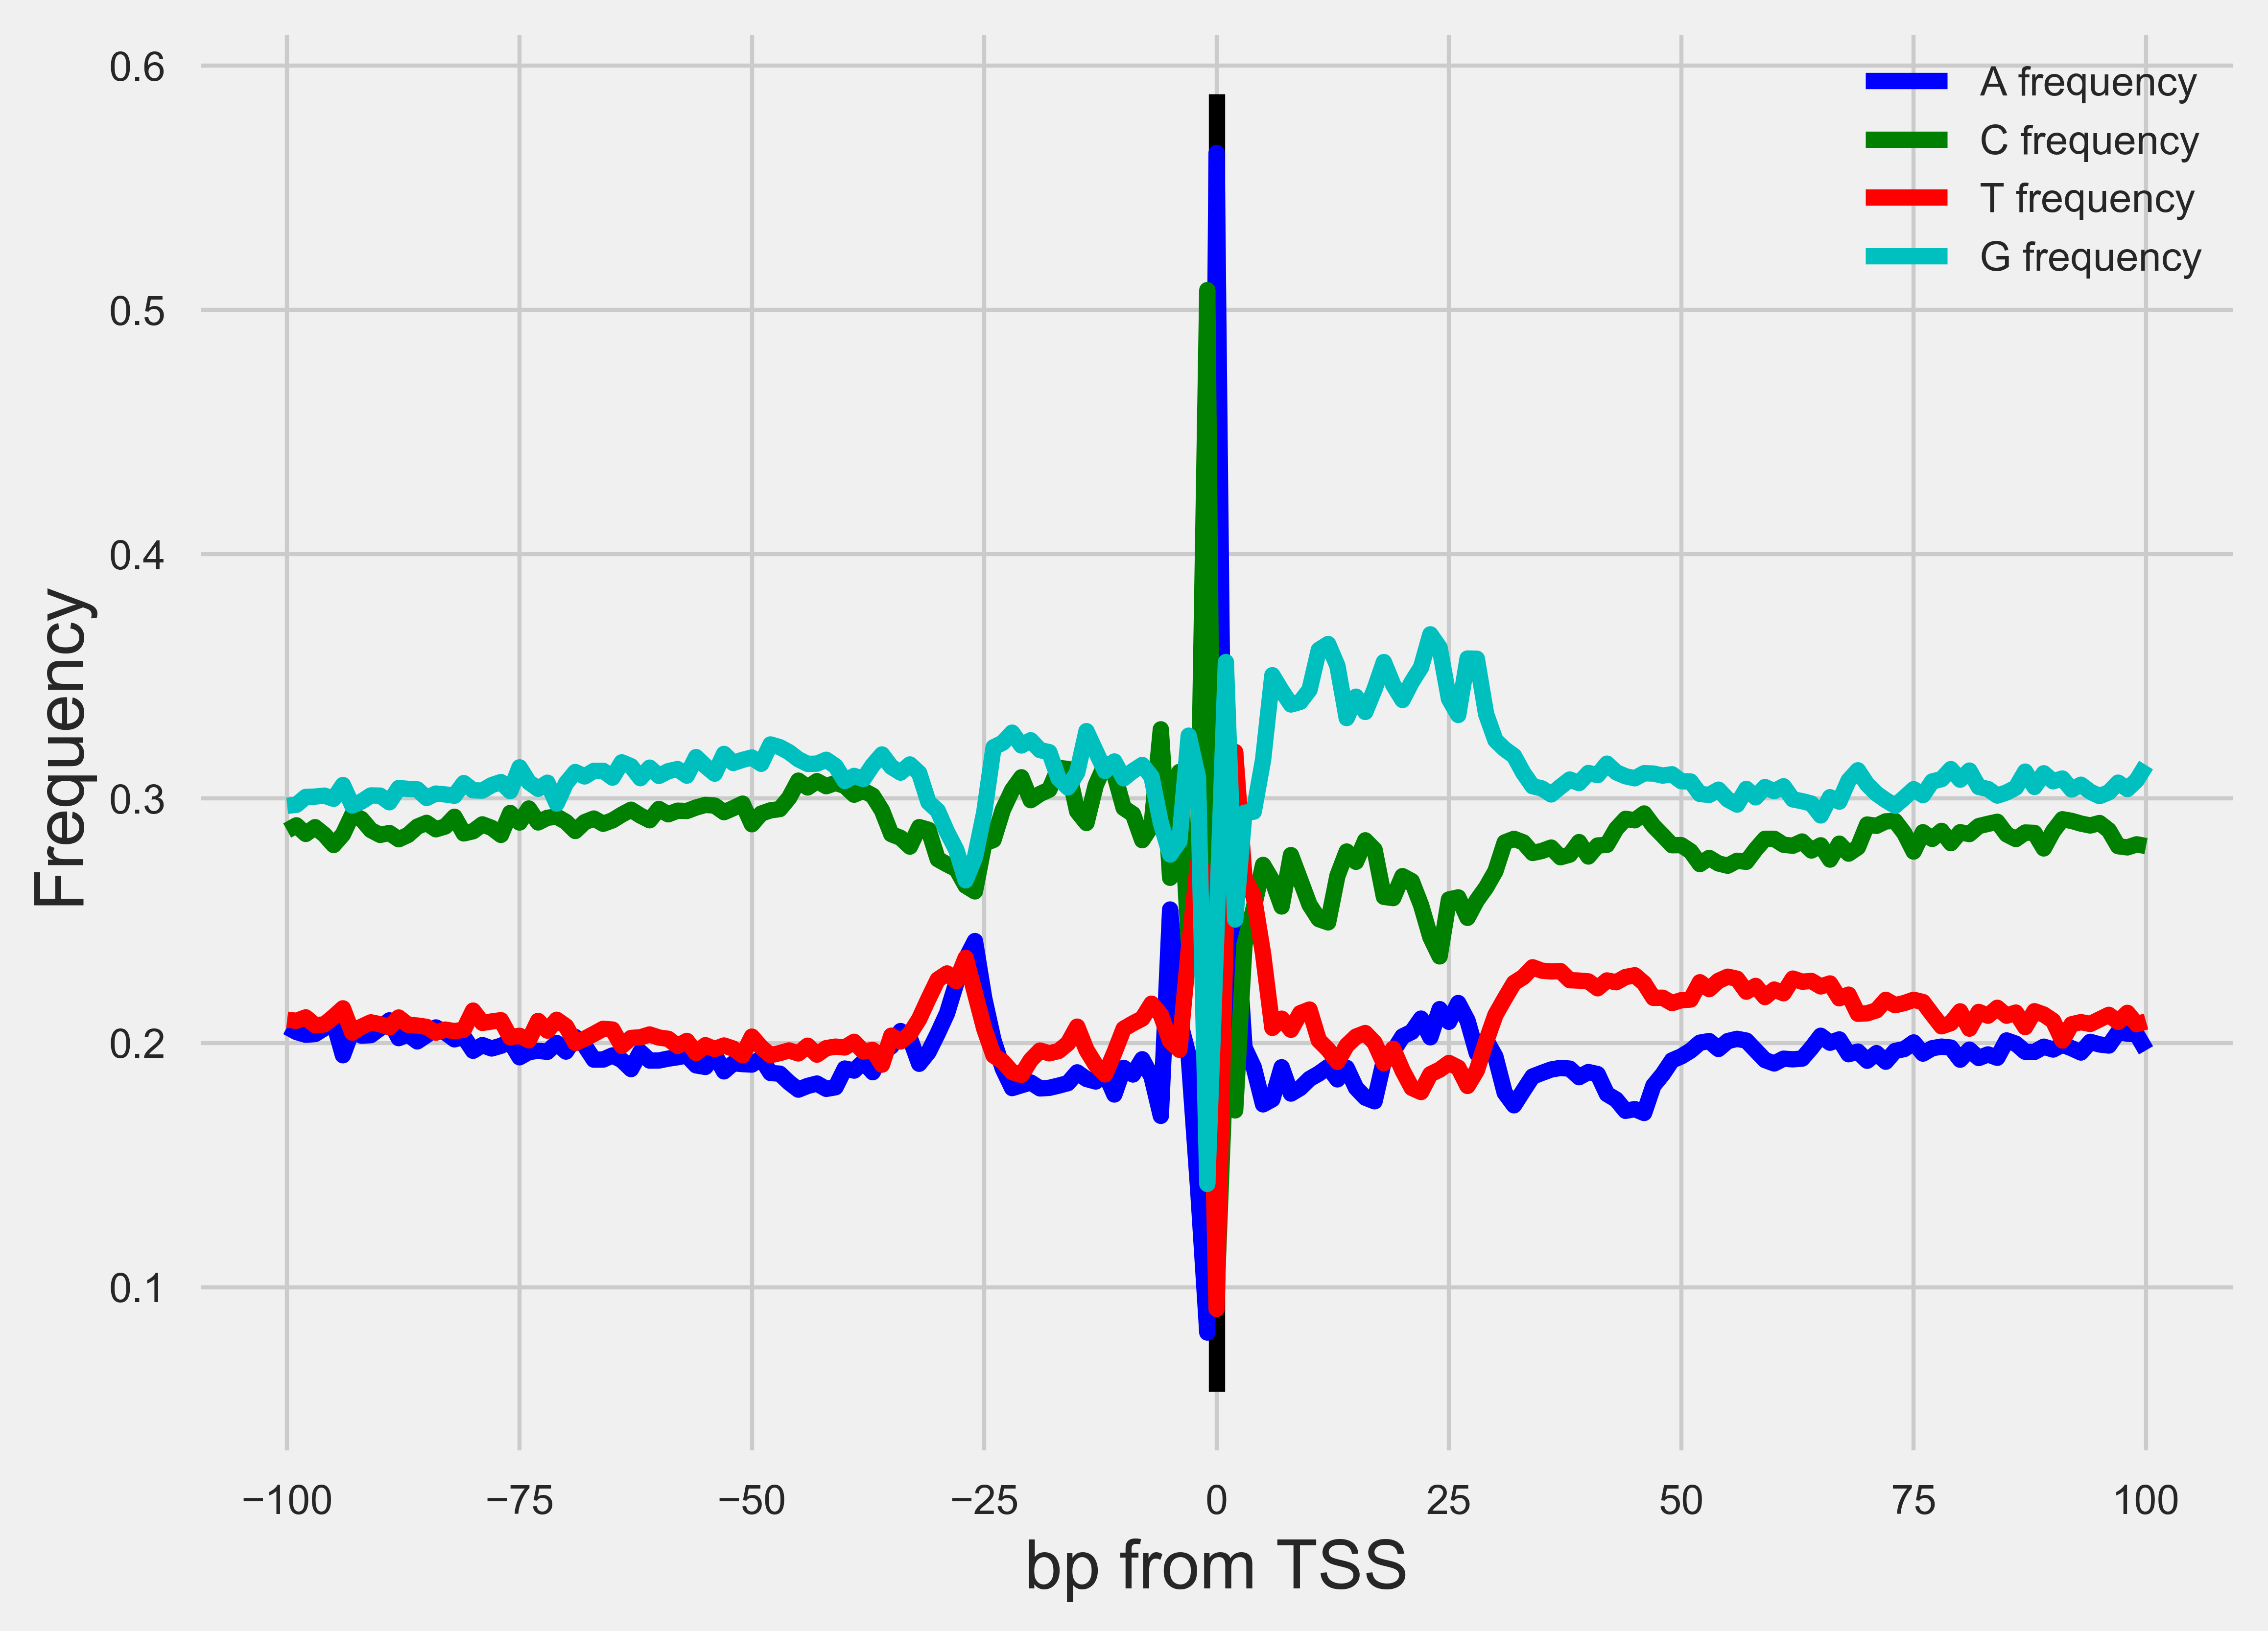

In [10]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 1000 -hist 1 -di > Results/Figures/Figure3/C_i_exp.nuc_freq_1000.txt


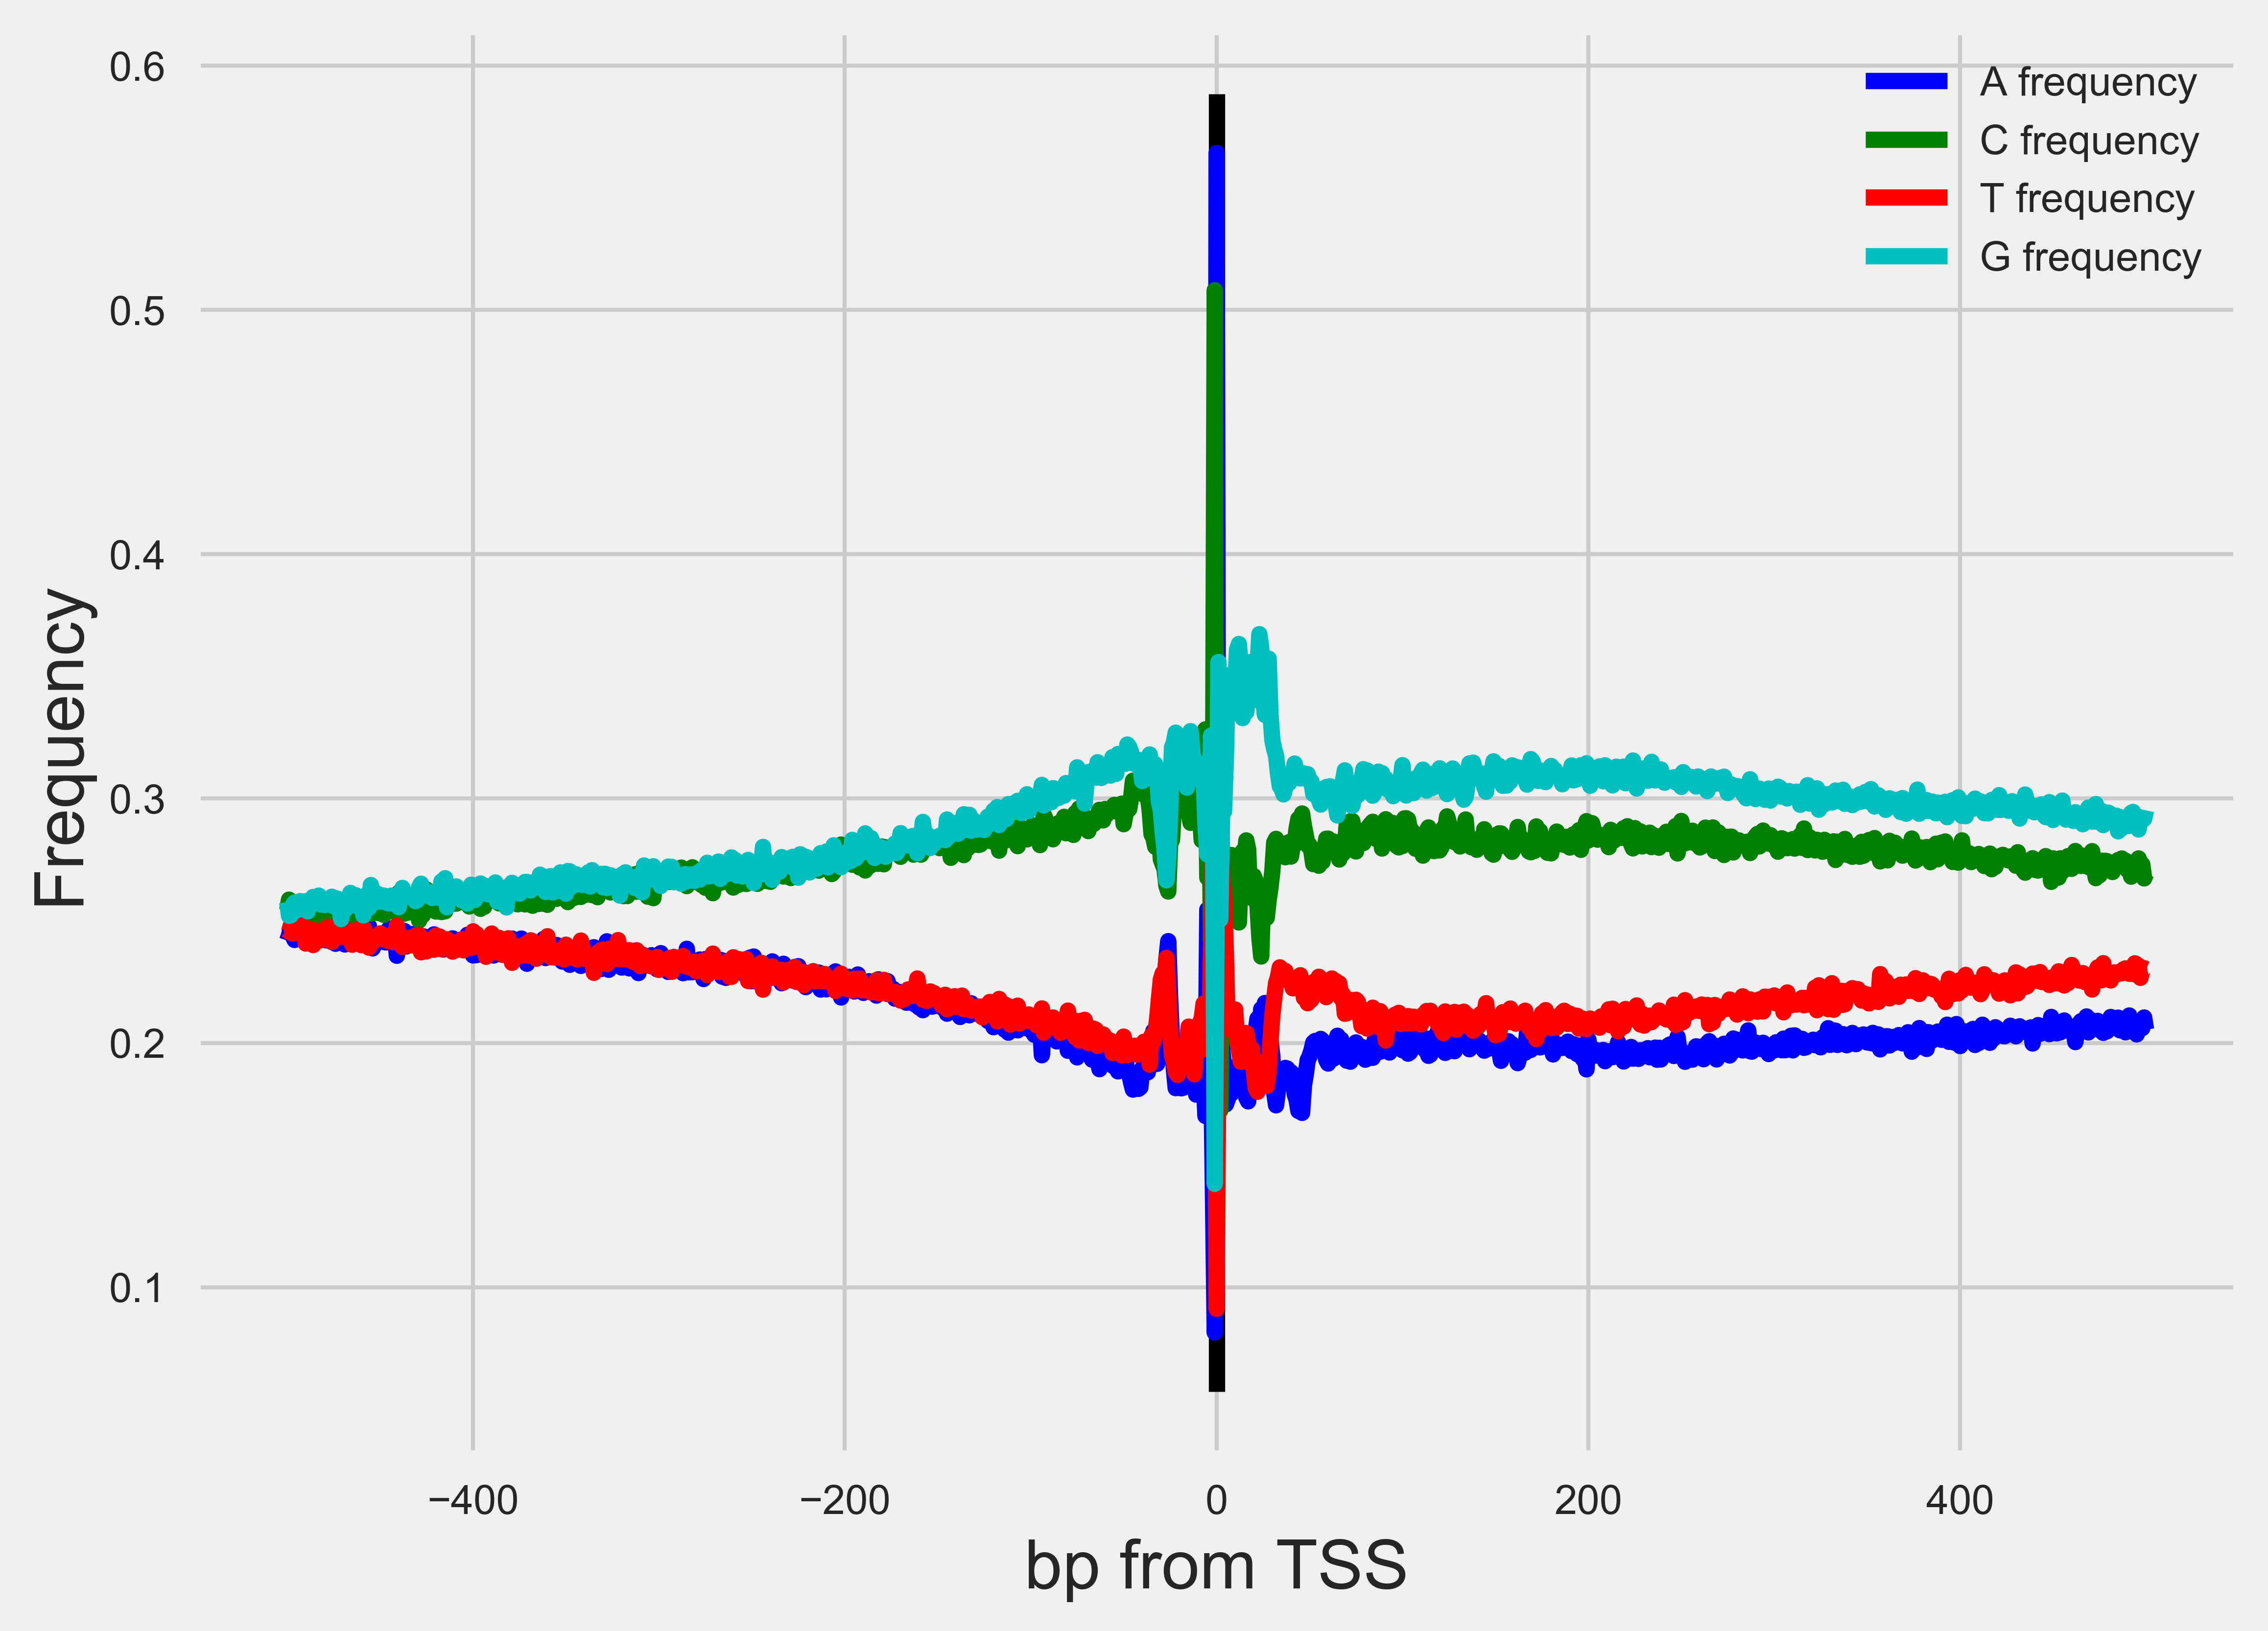

In [11]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/C_i_exp.nuc_freq_1000.txt',
    ref_fa,
    size=1000)

## ii. CHO-specific peaks and CHO-specific tags

annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt


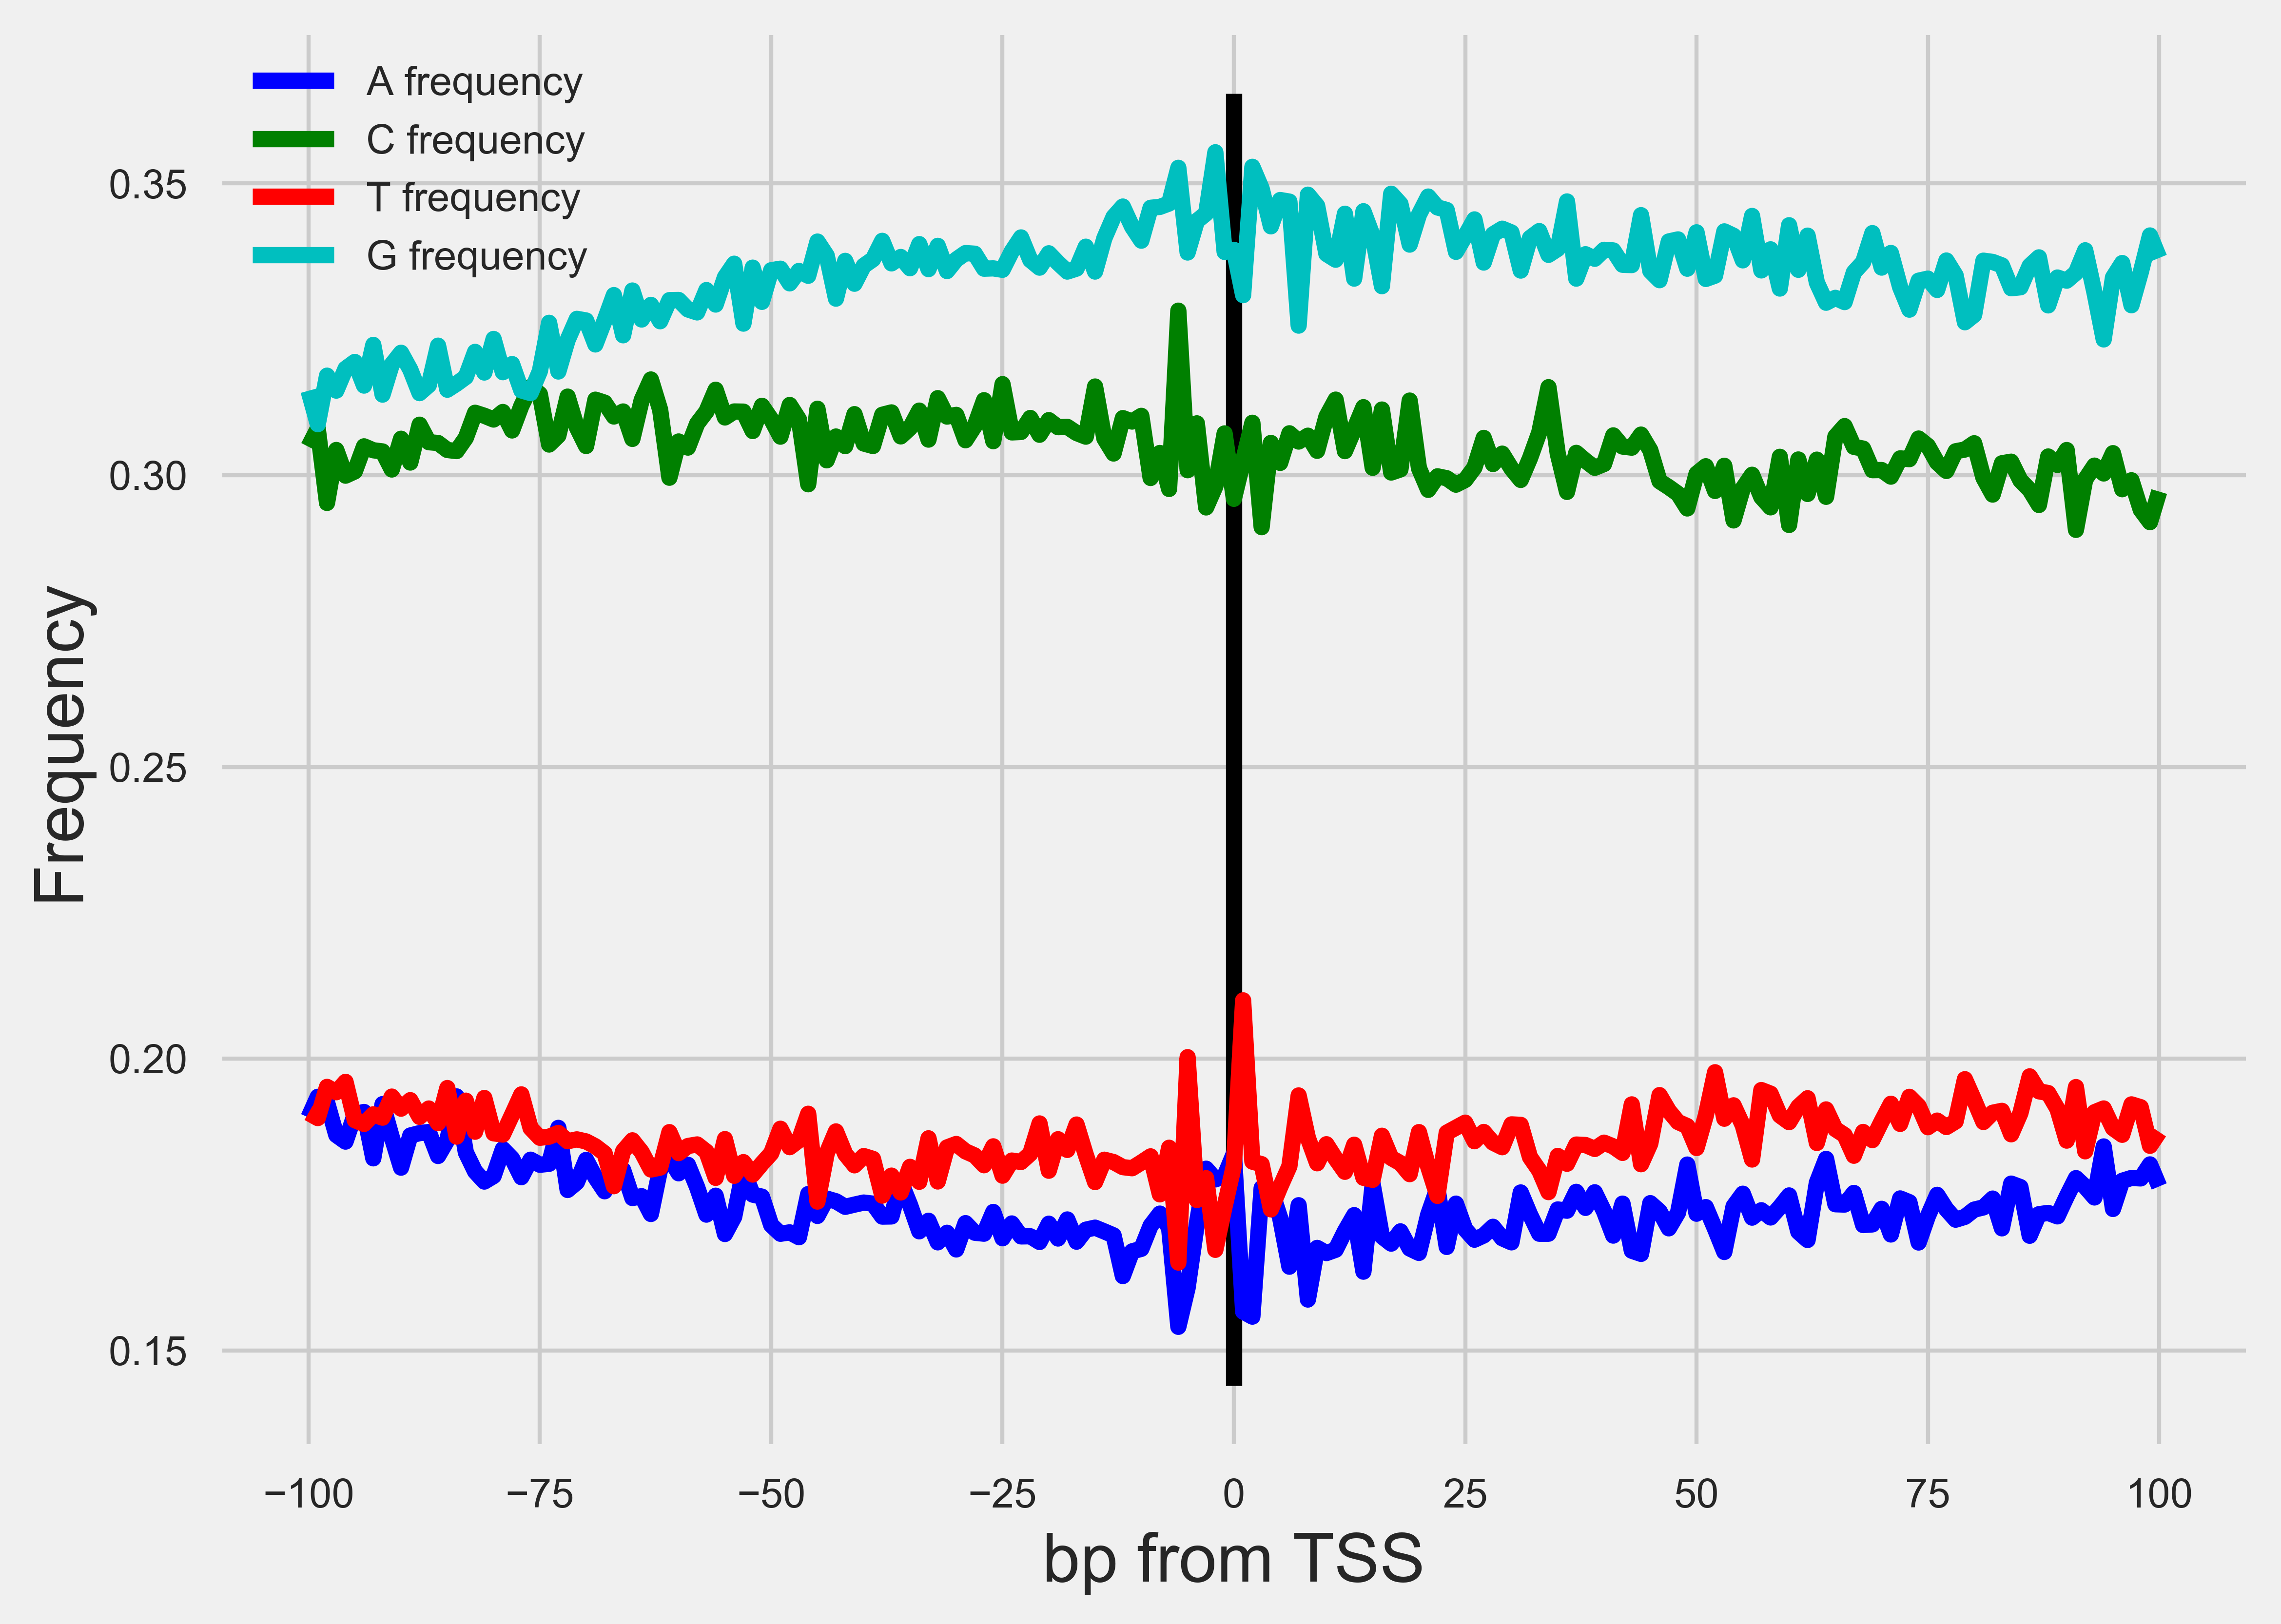

In [12]:
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt


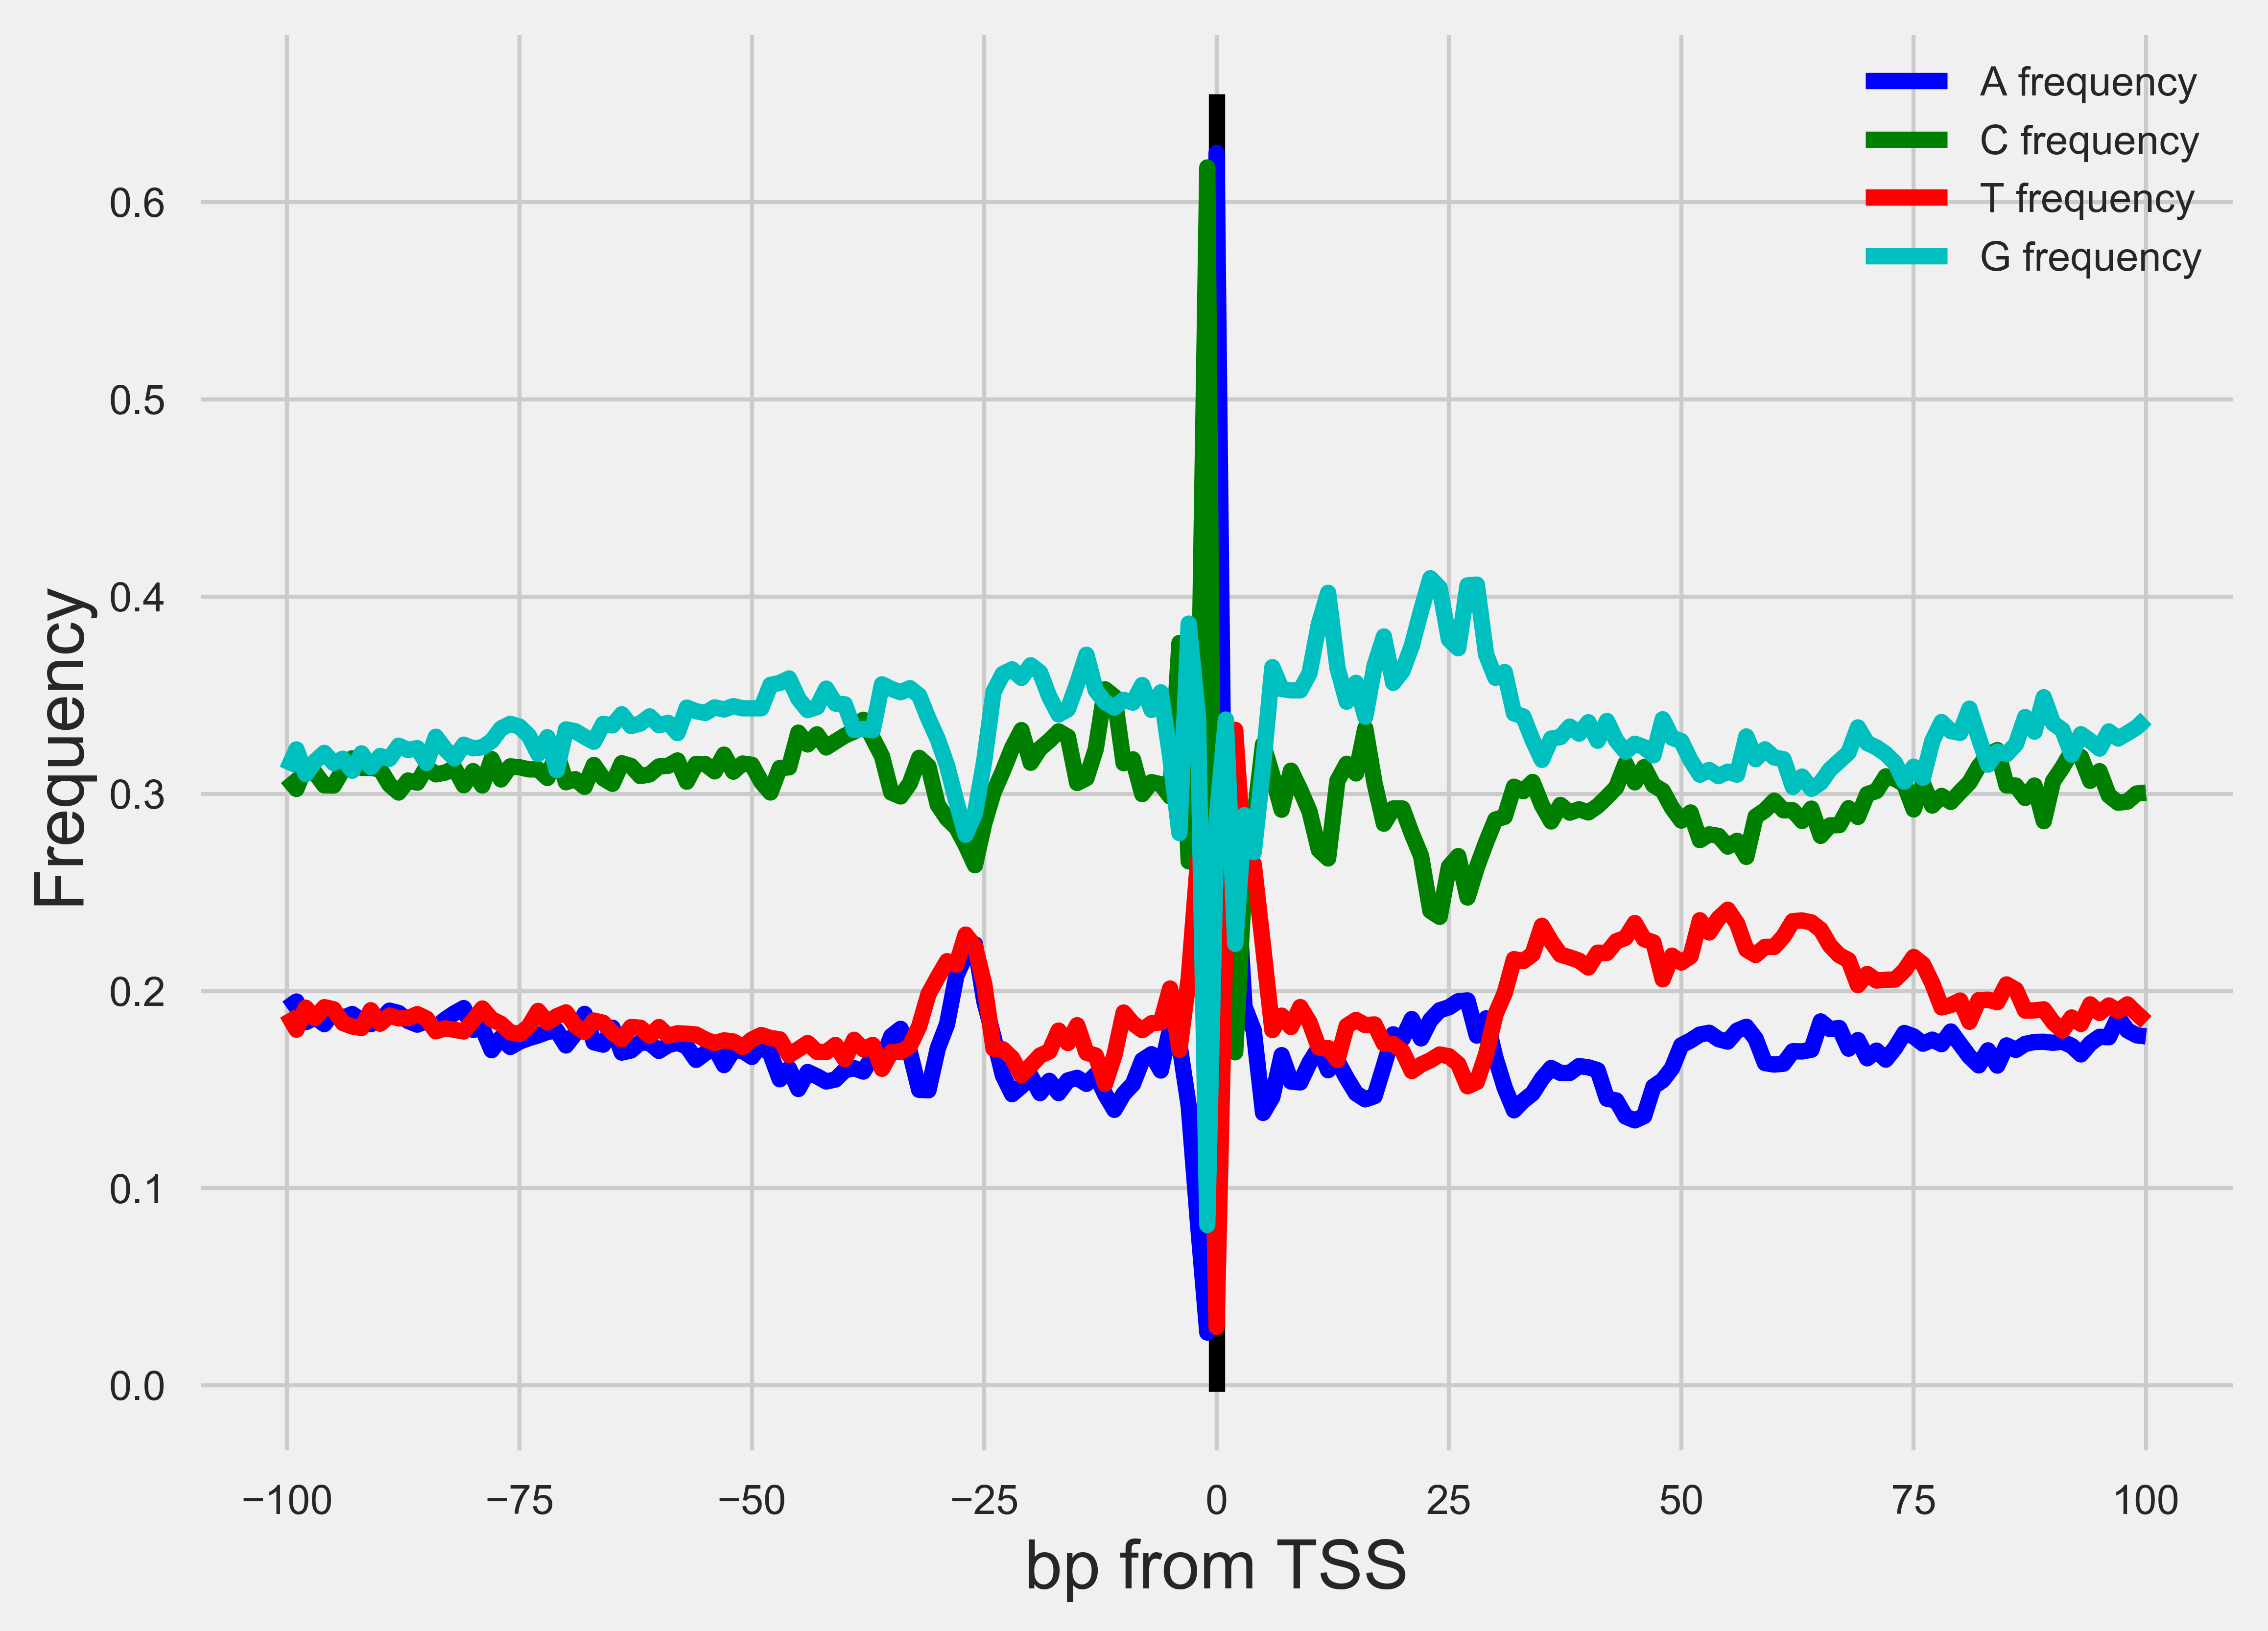

In [13]:
homer_nucleotide("Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv",
    'Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

------

------

------

------